In [1]:
import numpy as np
import pandas as pd
import interpret

from interpret.glassbox import ExplainableBoostingClassifier as ebc
from sklearn.model_selection import train_test_split
from interpret import show

from interpret.visual.plot import plot_bar
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib
matplotlib.rcParams.update({'font.size': 24})

In [2]:
data_dir = ""
feat_names_df = pd.read_csv("{}/RaniHasPneumonia/featureNames.txt".format(data_dir), sep='\t', header=None)
feat_names = feat_names_df[1].values

train_df = pd.read_csv("{}/RaniHasPneumonia/medis9847c.data".format(data_dir), sep='\t', header=None)
train_df = train_df.drop(train_df.columns[47], axis=1) # Drop the target.
train_df.columns = feat_names

test_df = pd.read_csv("{}/RaniHasPneumonia/medis9847c.test".format(data_dir), sep='\t', header=None)
test_df = test_df.drop(test_df.columns[47], axis=1)
test_df.columns = feat_names

In [3]:
df = pd.concat([train_df, test_df])
Y = df['outcome (0=lines, 1=dies)']
X = df.copy()
X = df.drop('outcome (0=lines, 1=dies)', axis=1)

In [4]:
X.shape, Y.shape

((14199, 46), (14199,))

In [5]:
# Build and fit a high-fidelity additive model.
from experiment_utils import run_experiment
ebm, ebm_global = run_experiment(X, Y)

XGB-1
AUC	Train:0.87
AUC	Test:0.83
APS	Train:0.52
APS	Test:0.43
F1	Train:0.40
F1	Test:0.35
XGB-2
AUC	Train:0.95
AUC	Test:0.82
APS	Train:0.83
APS	Test:0.43
F1	Train:0.70
F1	Test:0.41
XGB-3
AUC	Train:0.99
AUC	Test:0.79
APS	Train:0.97
APS	Test:0.40
F1	Train:0.90
F1	Test:0.37
MLP
AUC	Train:0.76
AUC	Test:0.71
APS	Train:0.39
APS	Test:0.31
F1	Train:0.23
F1	Test:0.19
EBM
AUC	Train:0.87
AUC	Test:0.85
APS	Train:0.49
APS	Test:0.46
F1	Train:0.31
F1	Test:0.29
Calibrated EBM
AUC	Train:0.87
AUC	Test:0.87
APS	Train:0.48
APS	Test:0.50
F1	Train:0.33
F1	Test:0.34


In [6]:
# Helper functions for pretty plotting available from:
# https://github.com/blengerich/ebm_utils

from ebm_utils.analysis.changepoints import find_and_plot_discontinuities, find_and_plot_non_monotonicities

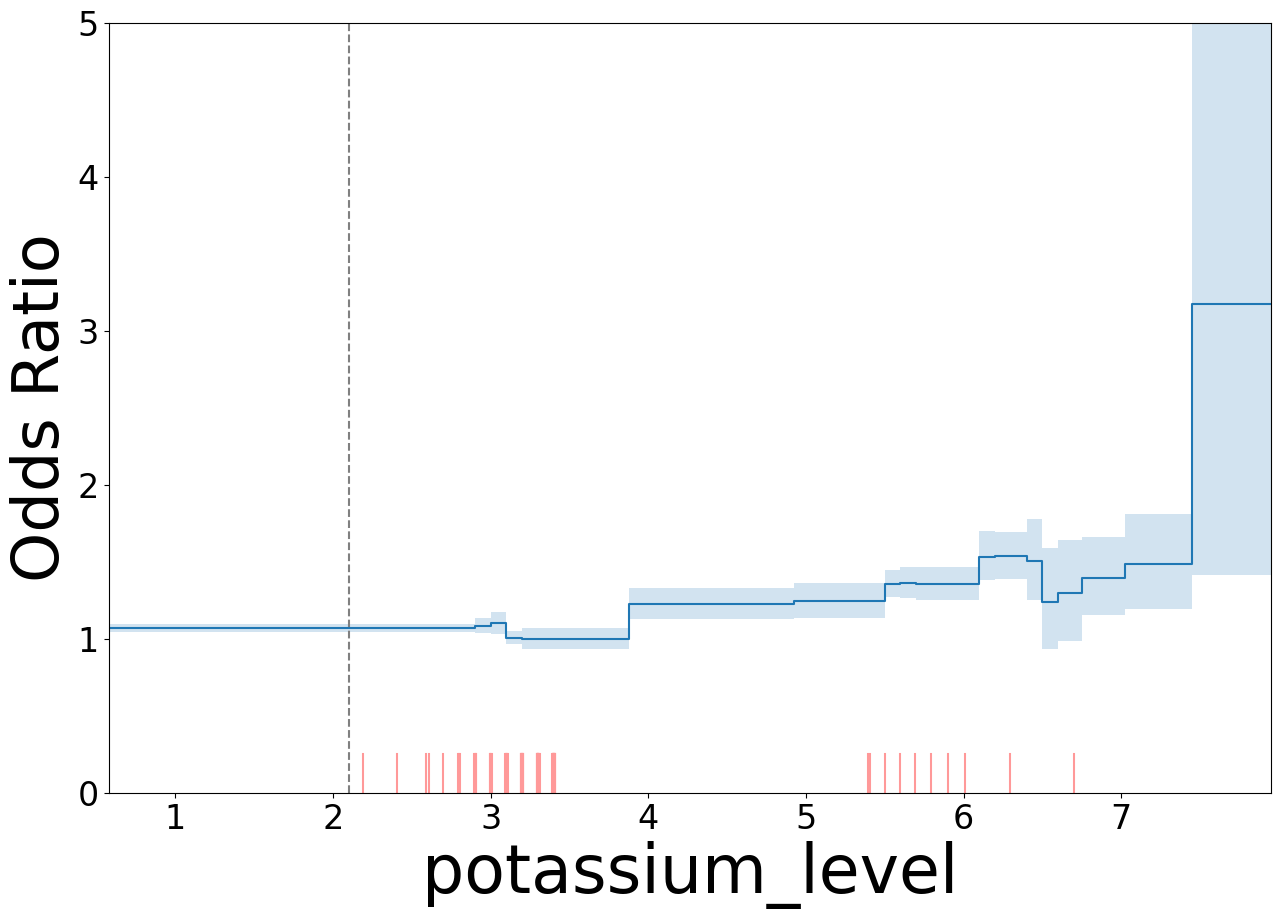

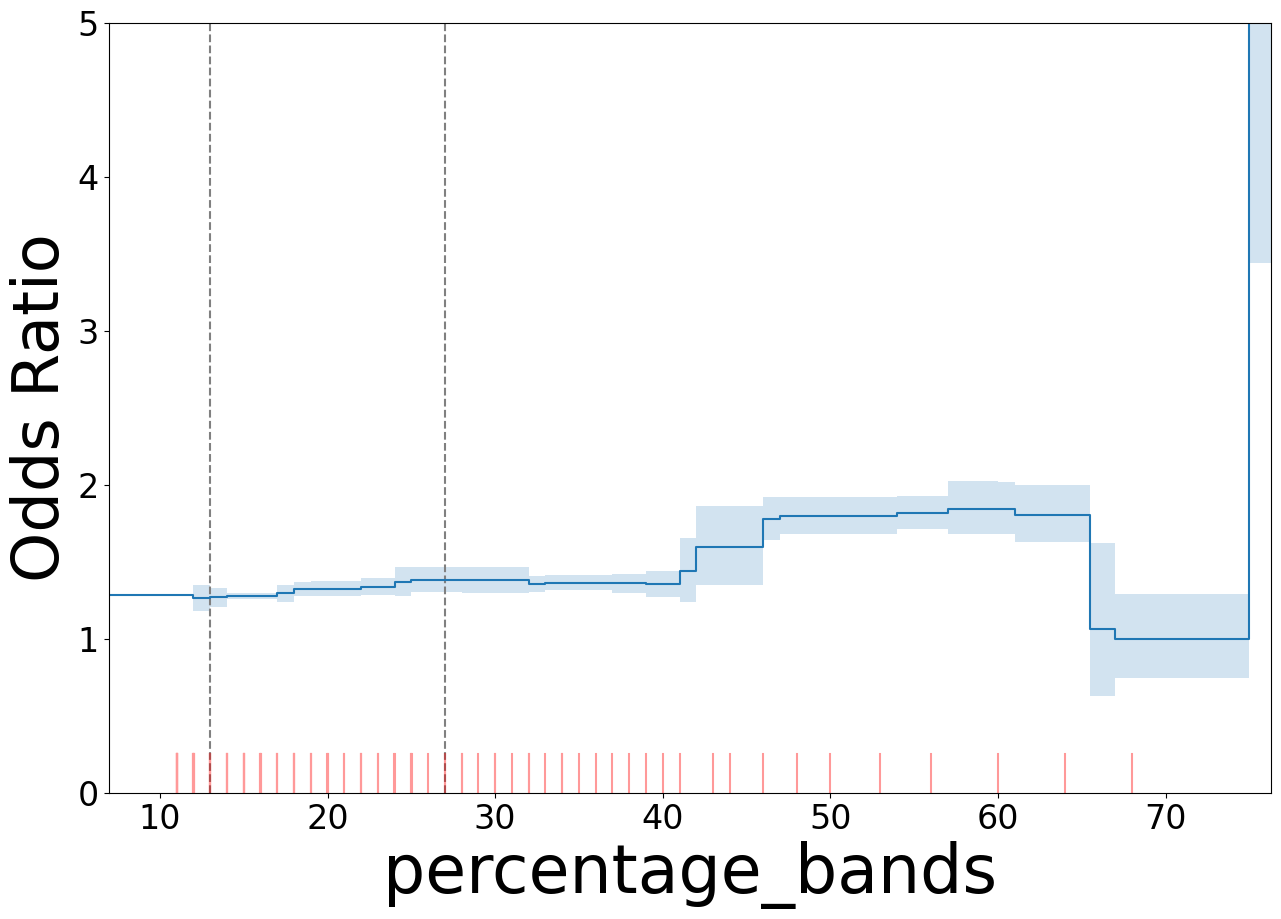

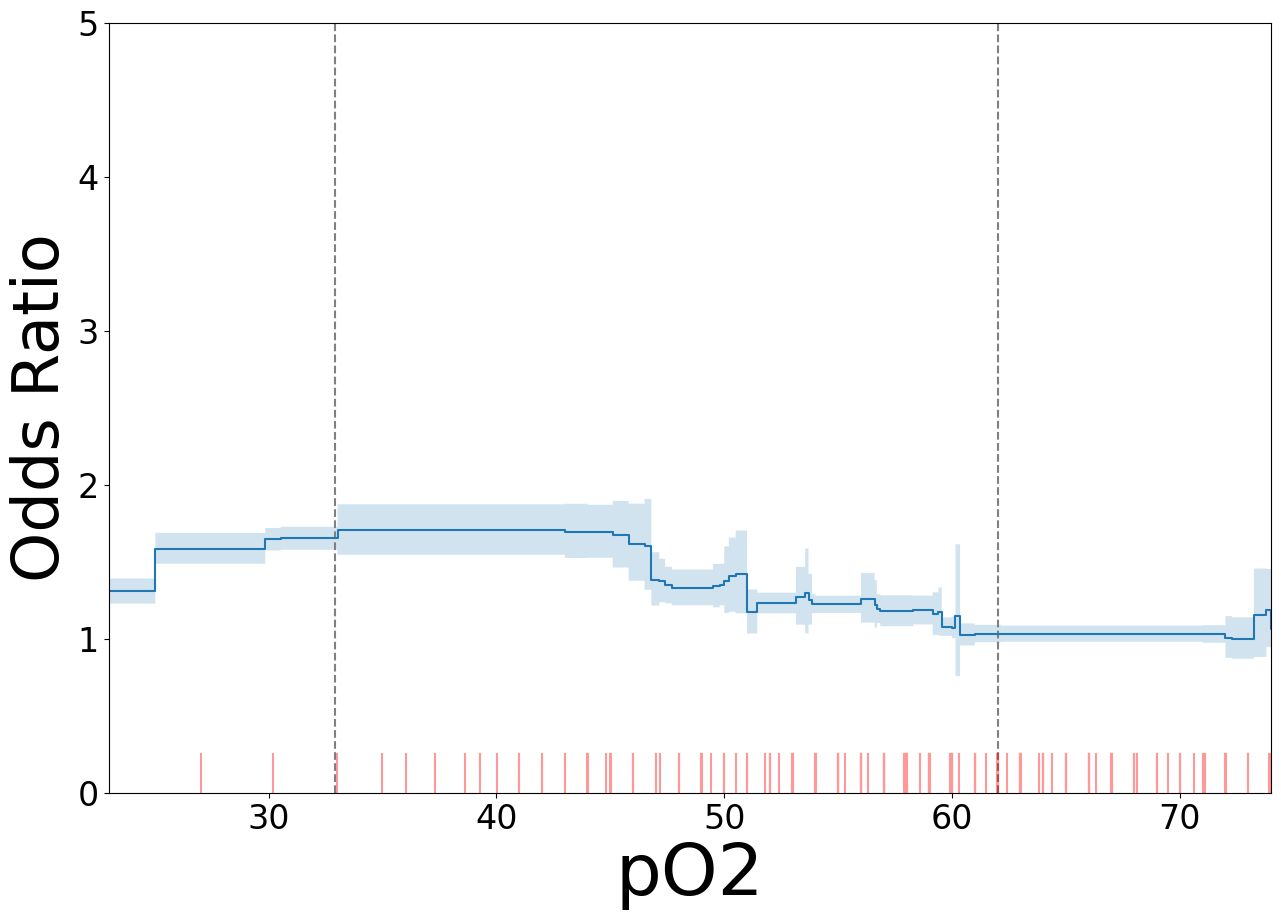

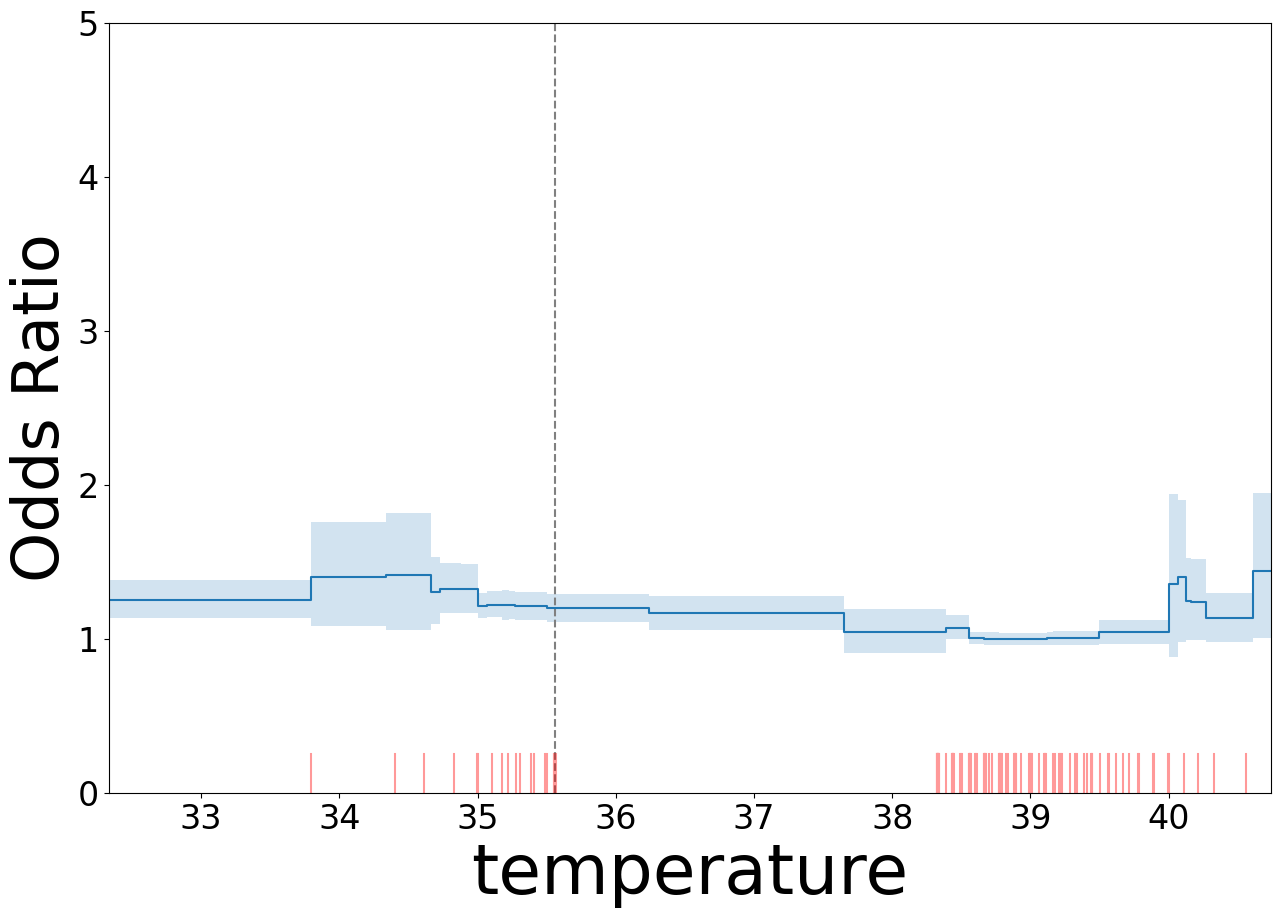

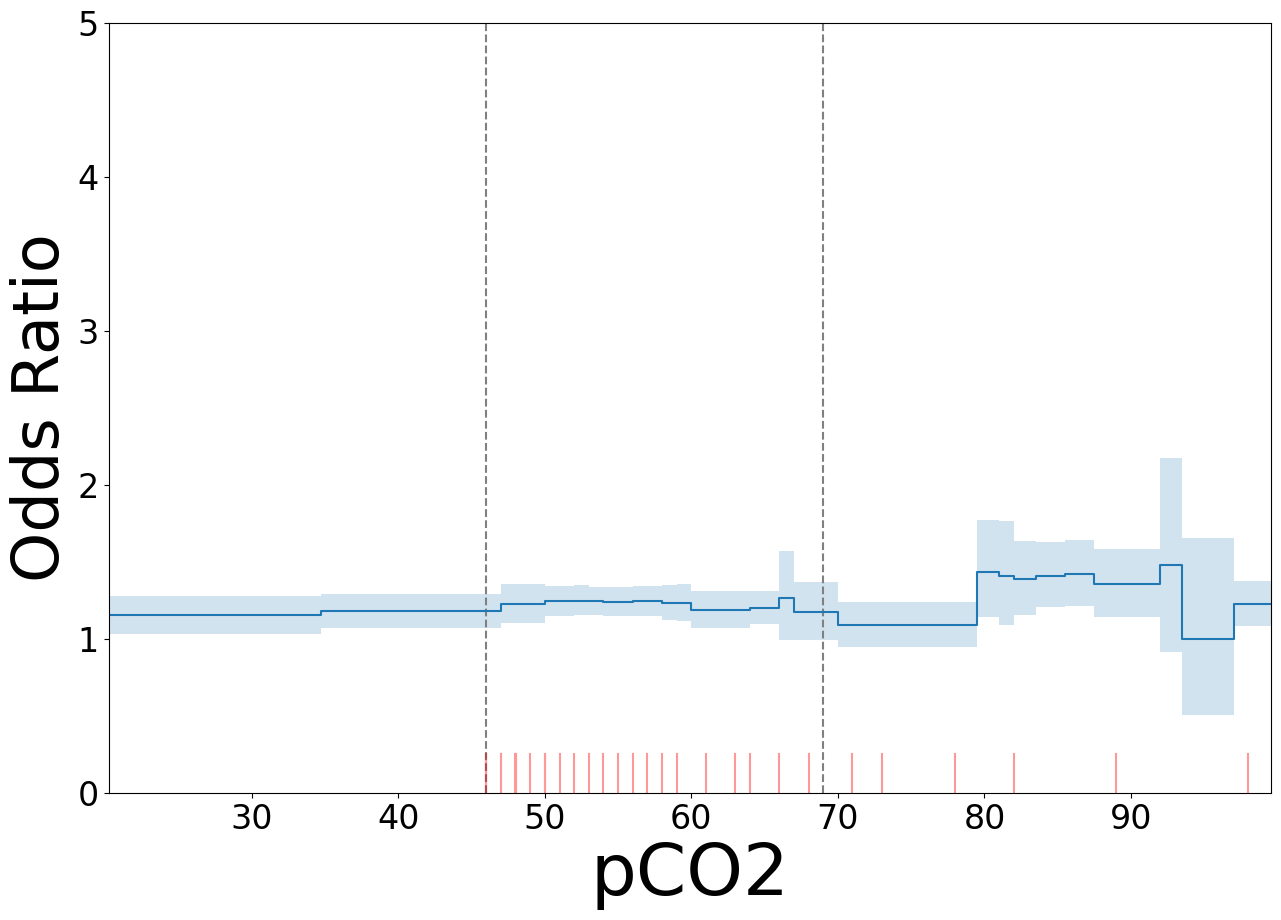

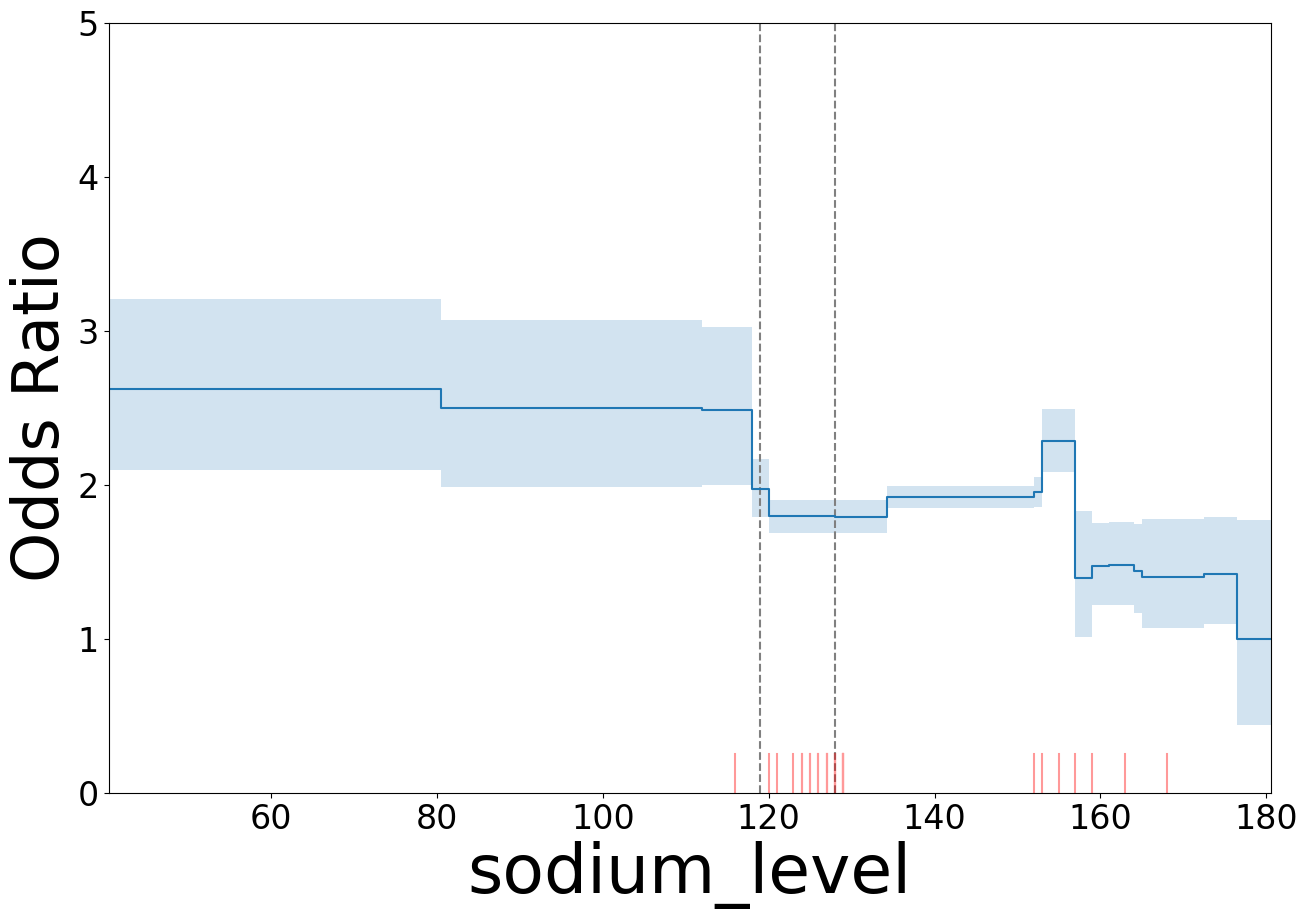

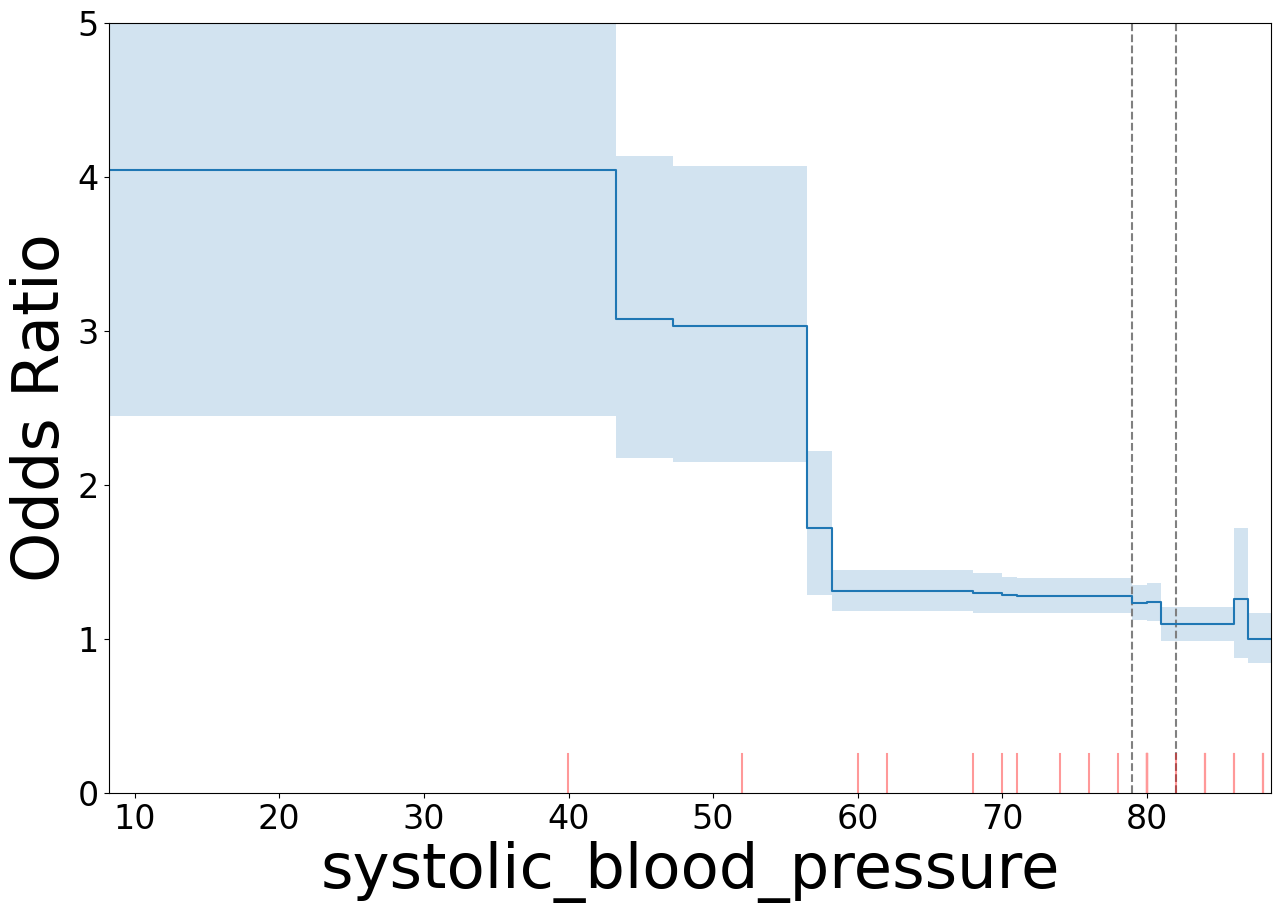

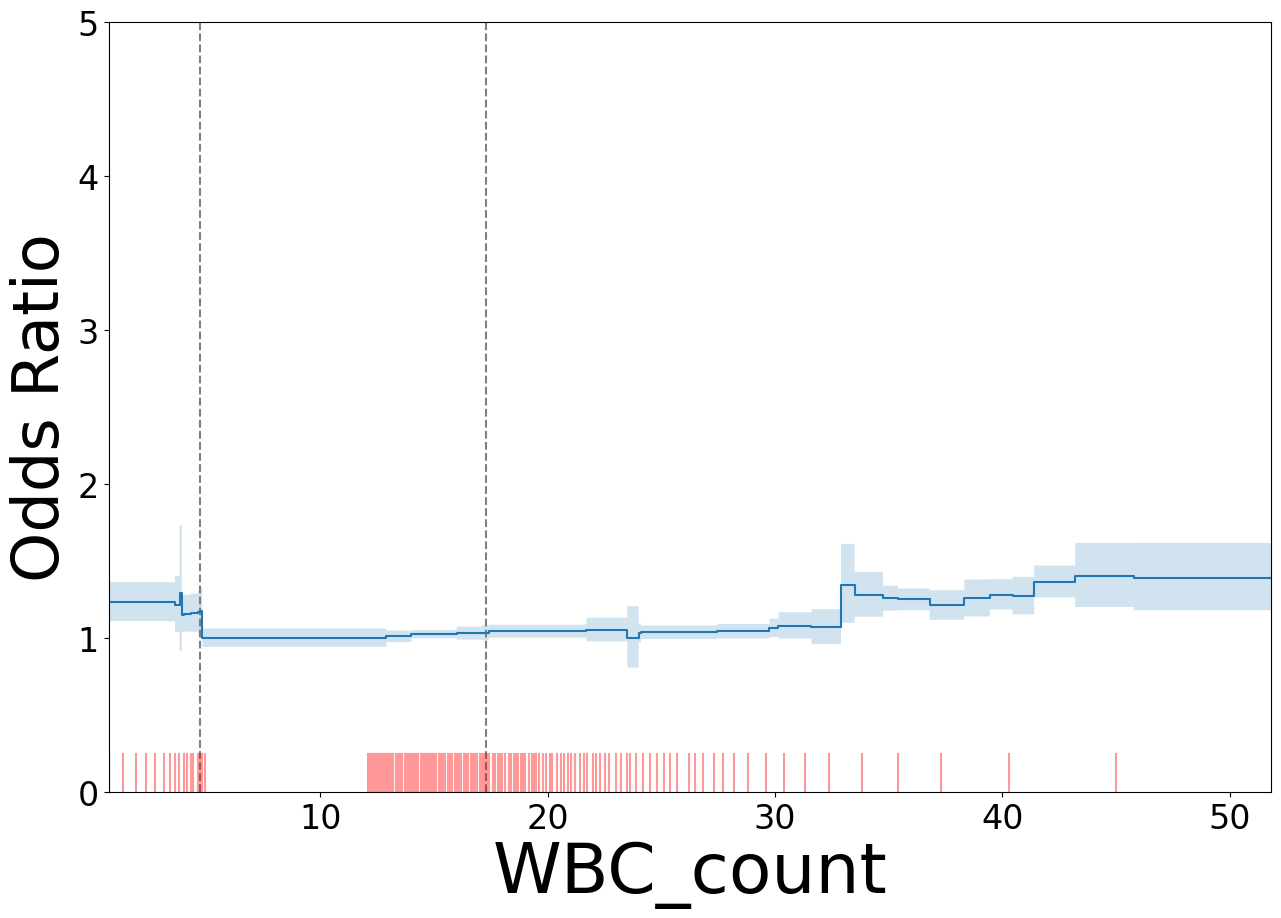

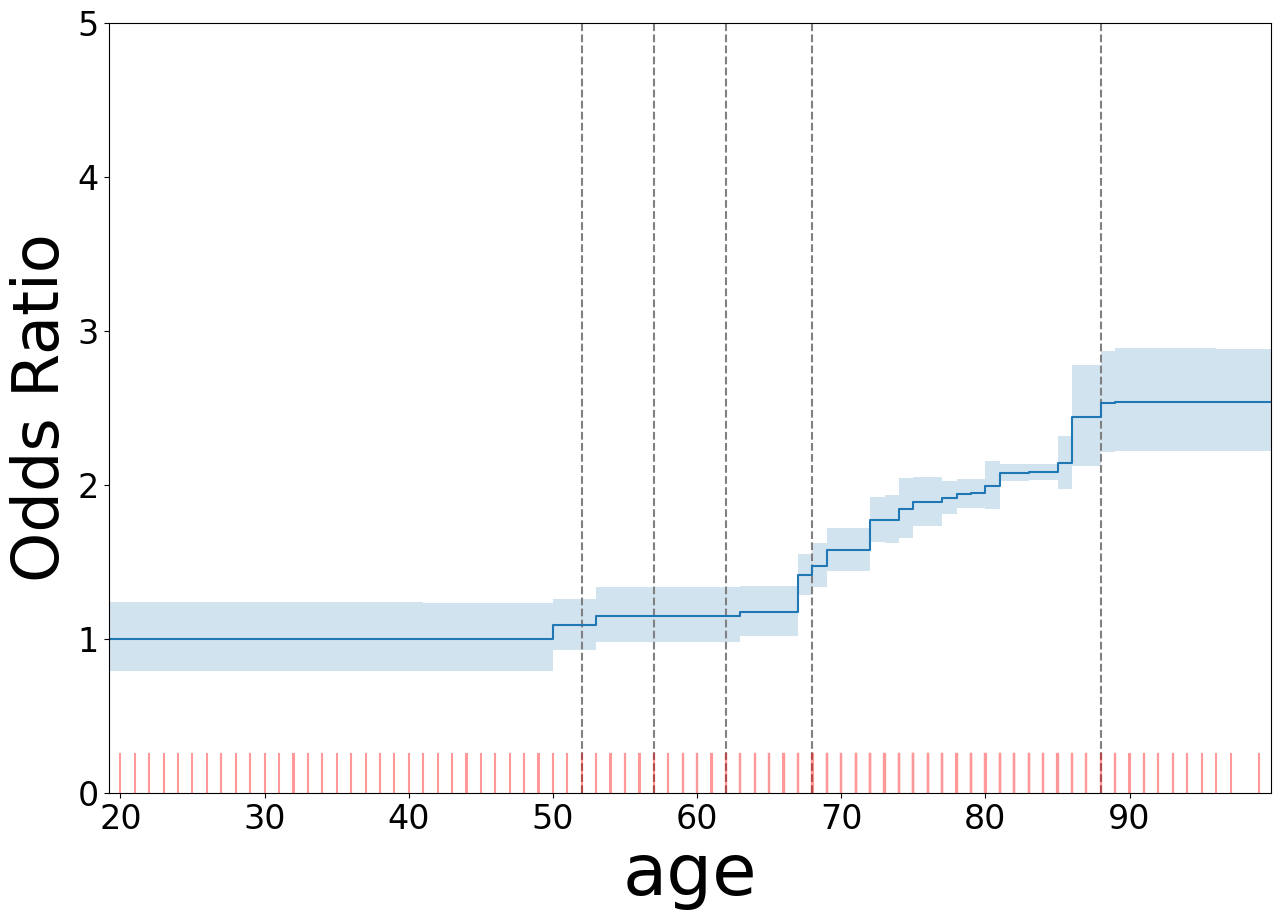

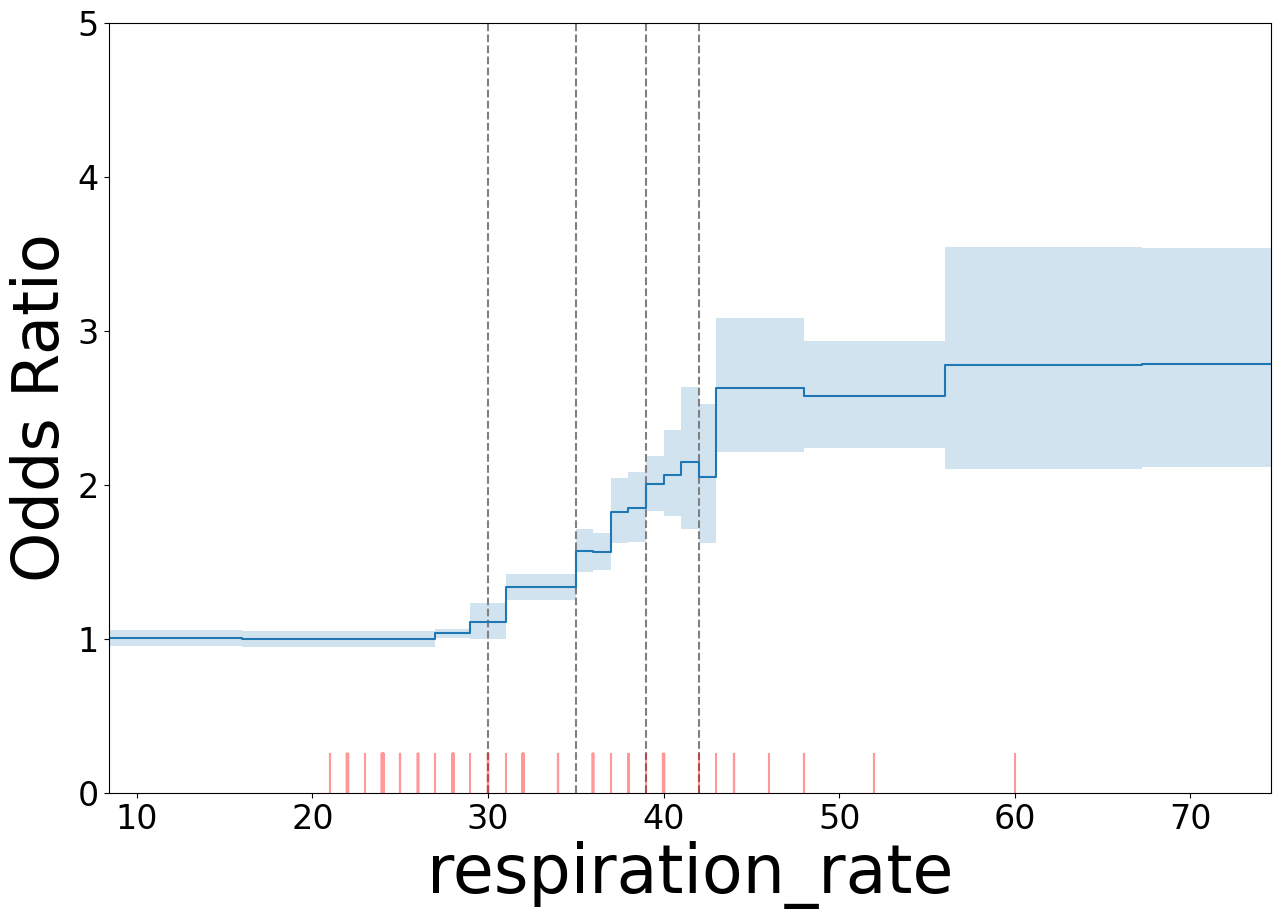

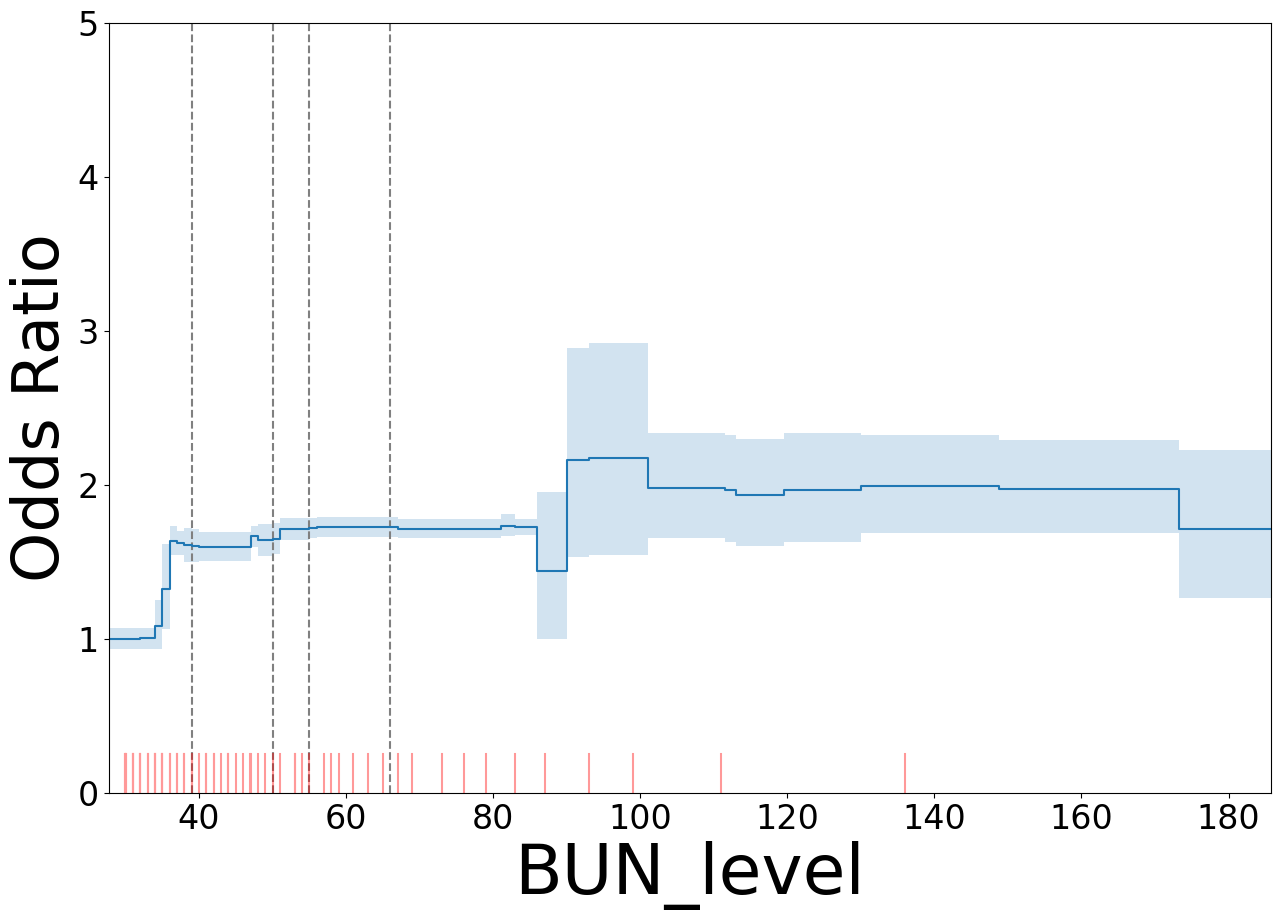

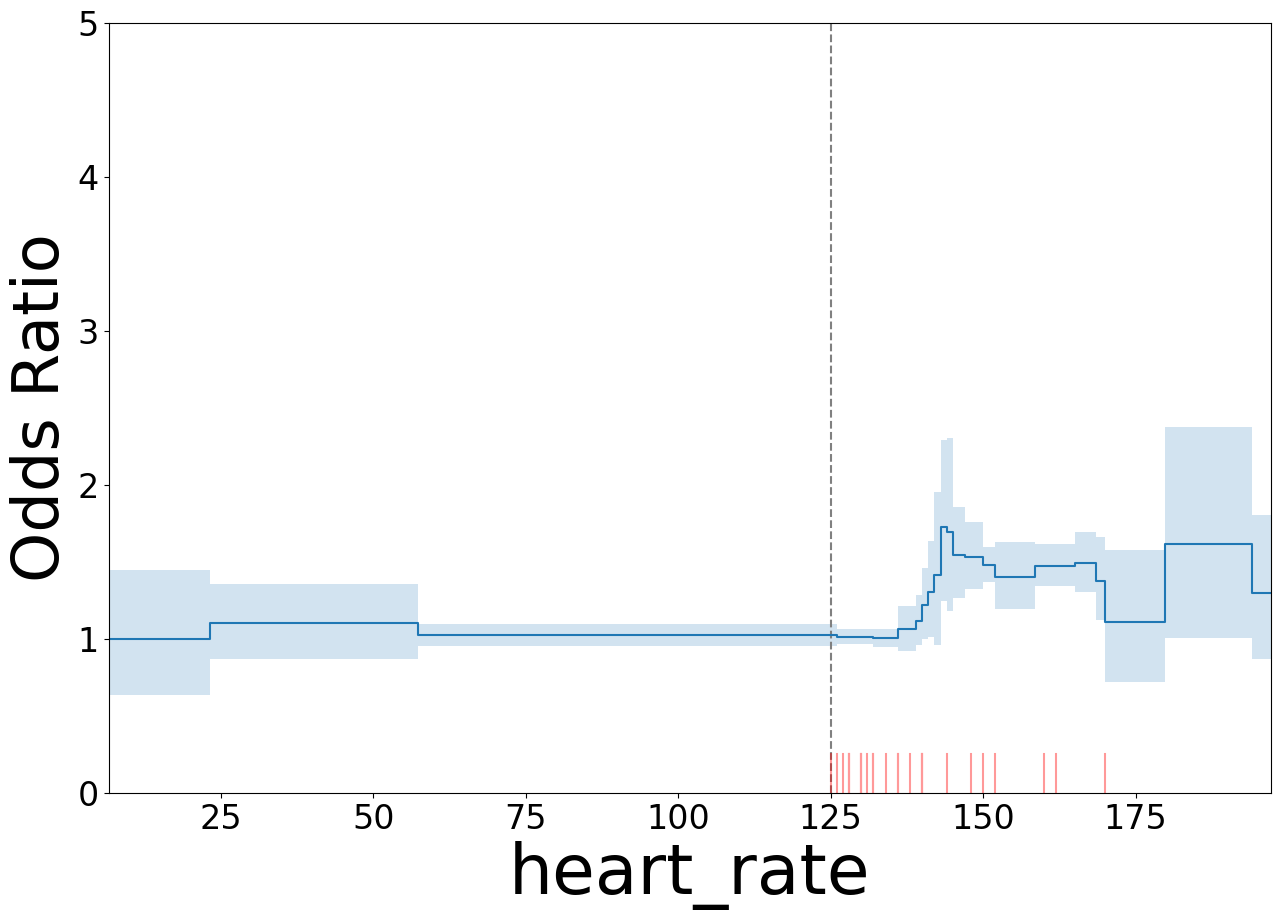

In [7]:
discontinuities = find_and_plot_discontinuities(X, Y.values, min_samples=200, min_effect_size=1.2)

In [8]:
discontinuities

,Feature,Value,# Samples,Effect Size,P-Ratio
24,respiration_rate,42.00,355.0,1.314215,97.0
94,pO2,62.00,2295.0,1.525680,969.5000000000016
66,potassium_level,2.10,393.0,1.247155,86.79999999999997
27,systolic_blood_pressure,79.00,344.0,1.204478,64.0
98,pCO2,69.00,202.0,1.372771,64.0
99,WBC_count,0.30,316.0,1.223724,63.80000000000001
100,WBC_count,4.70,857.0,2.051942,616.0000000000007
57,BUN_level,50.00,252.0,1.263805,59.0
21,respiration_rate,30.00,2056.0,1.299734,539.0
84,pO2,32.90,570.0,2.504453,523.3


,Feature,Value
0,heart_rate,144.003701
1,systolic_blood_pressure,0.009986
2,albumin_level,2.400000
3,percentage_bands,57.995367
4,glucose_level,312.000000
5,sodium_level,153.993365
6,pH,7.120000


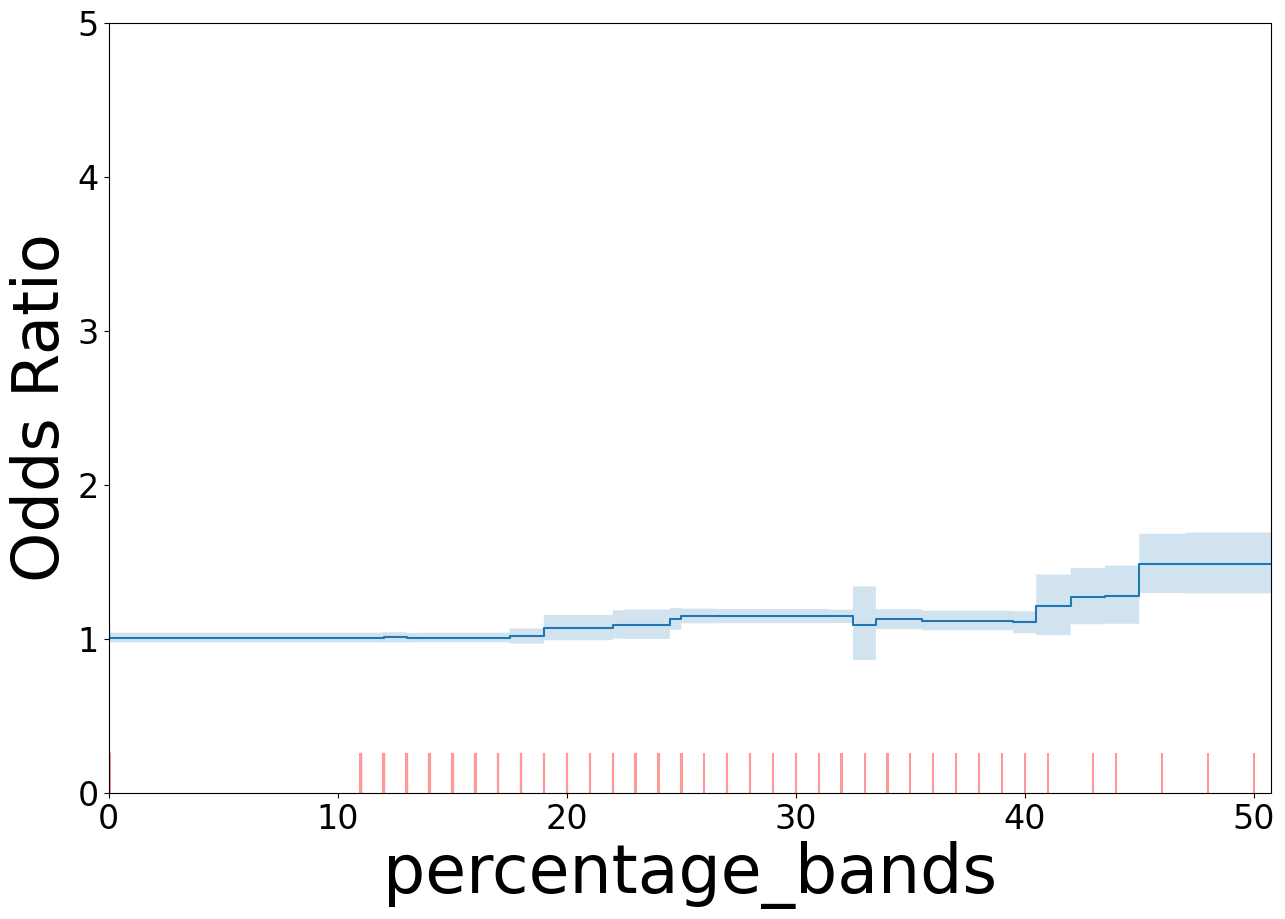

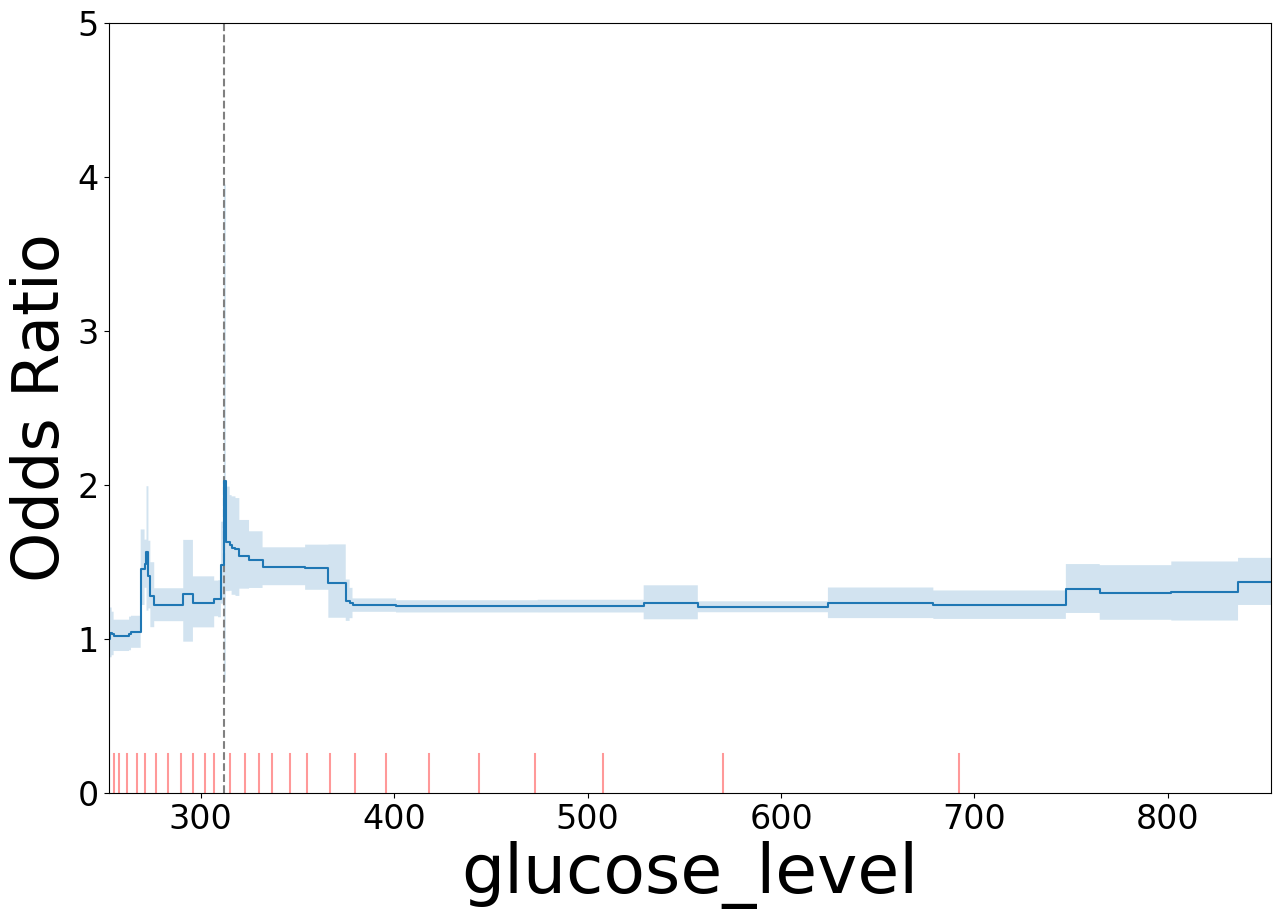

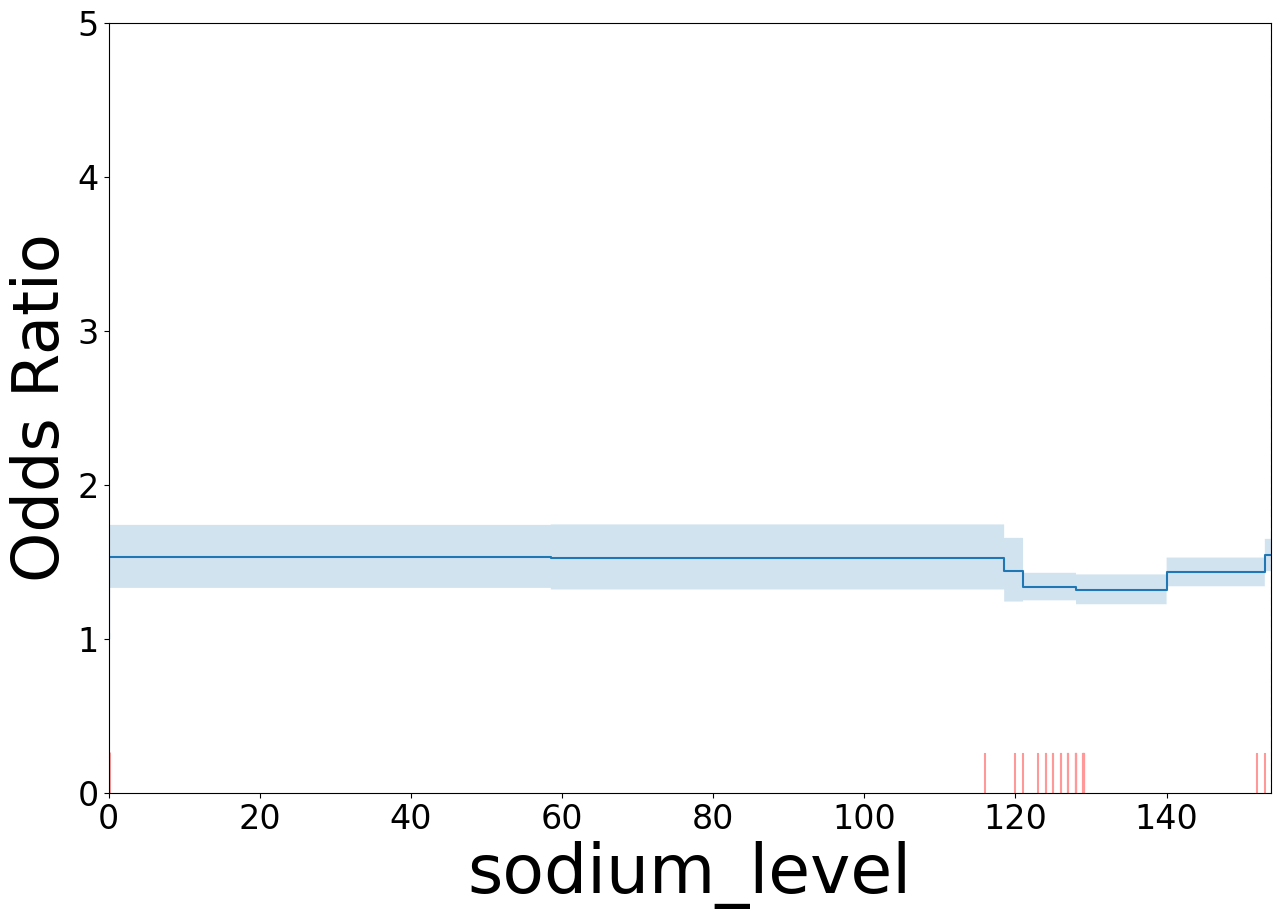

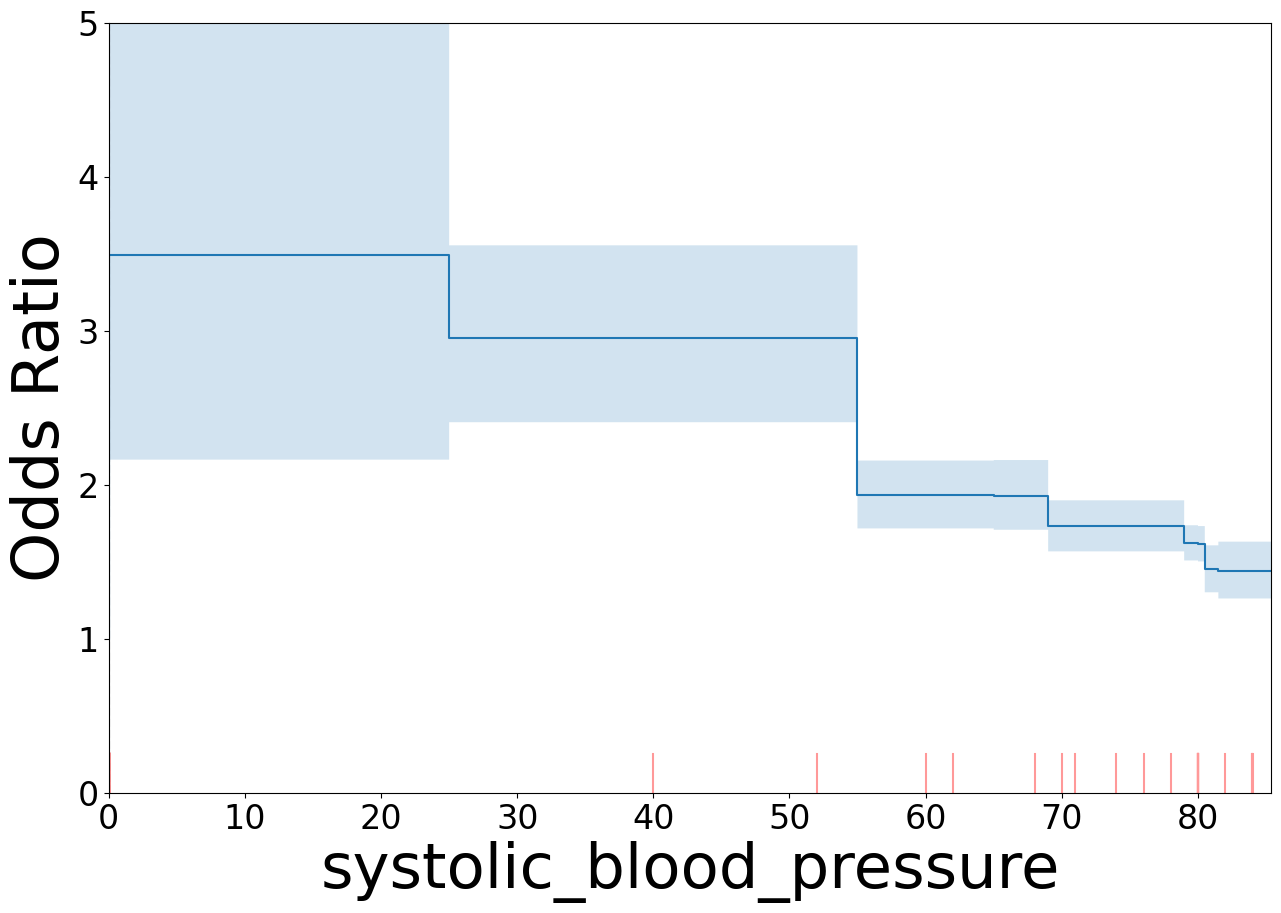

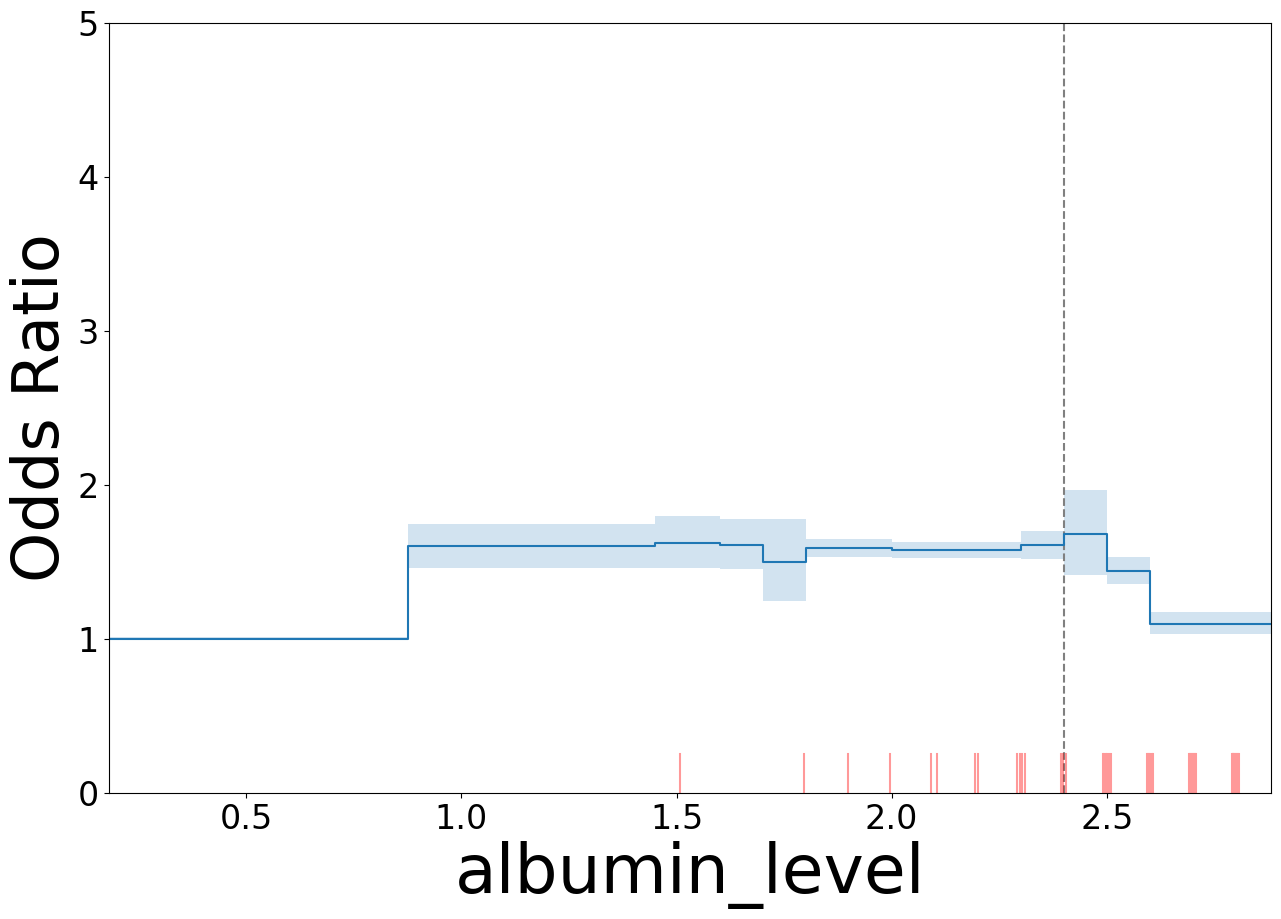

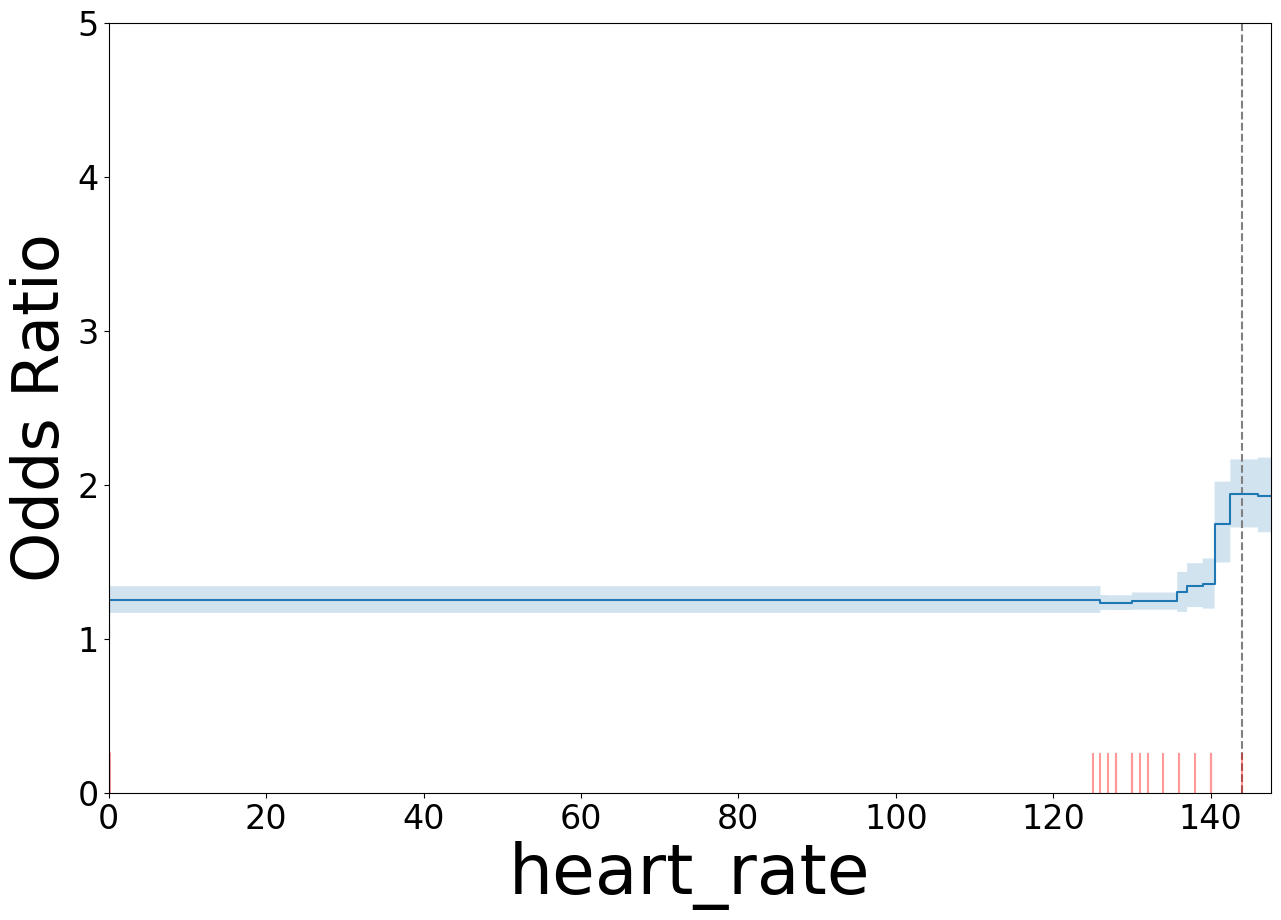

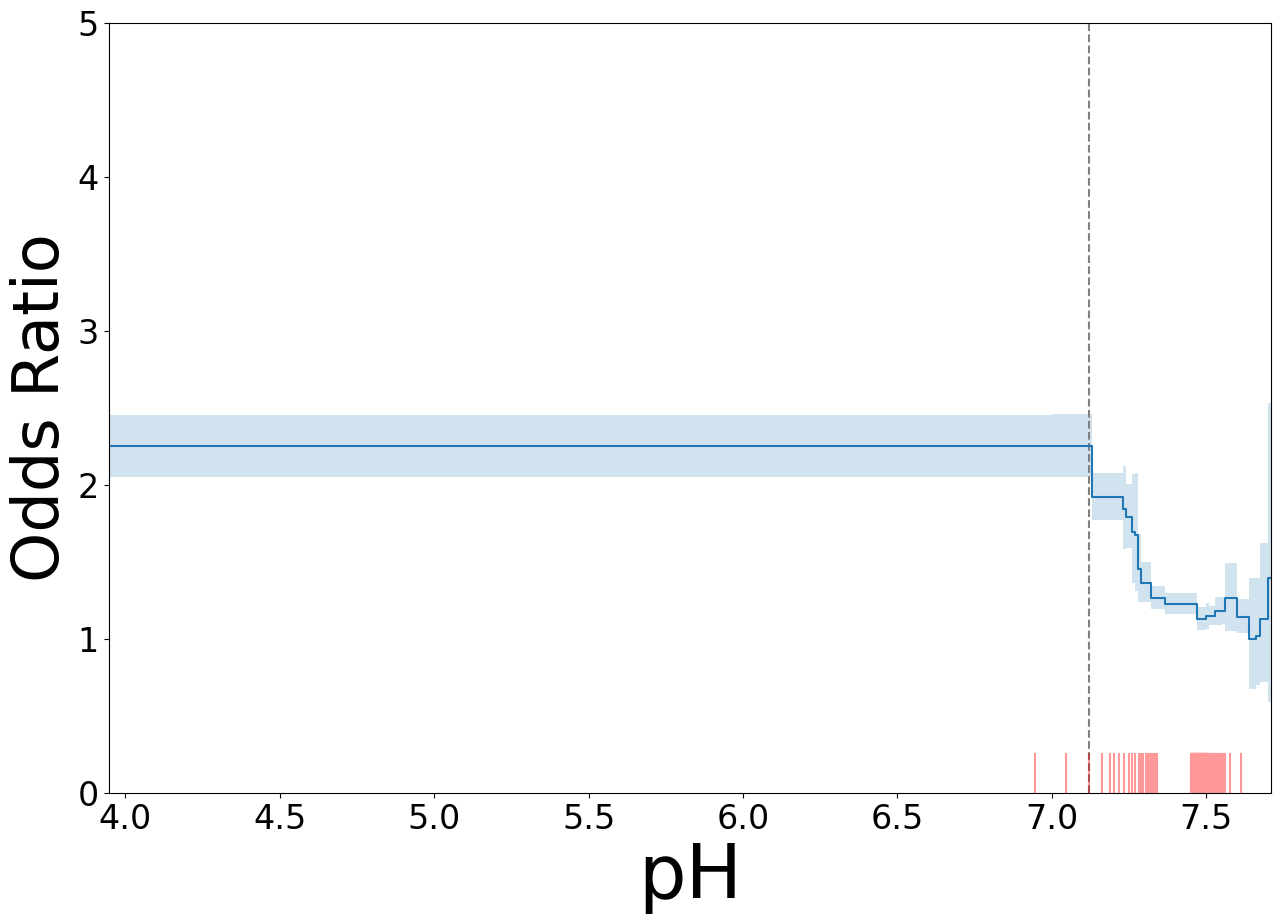

In [10]:
find_and_plot_non_monotonicities(X, Y.values, prob_threshold=0.1, counter_causal_only=True)

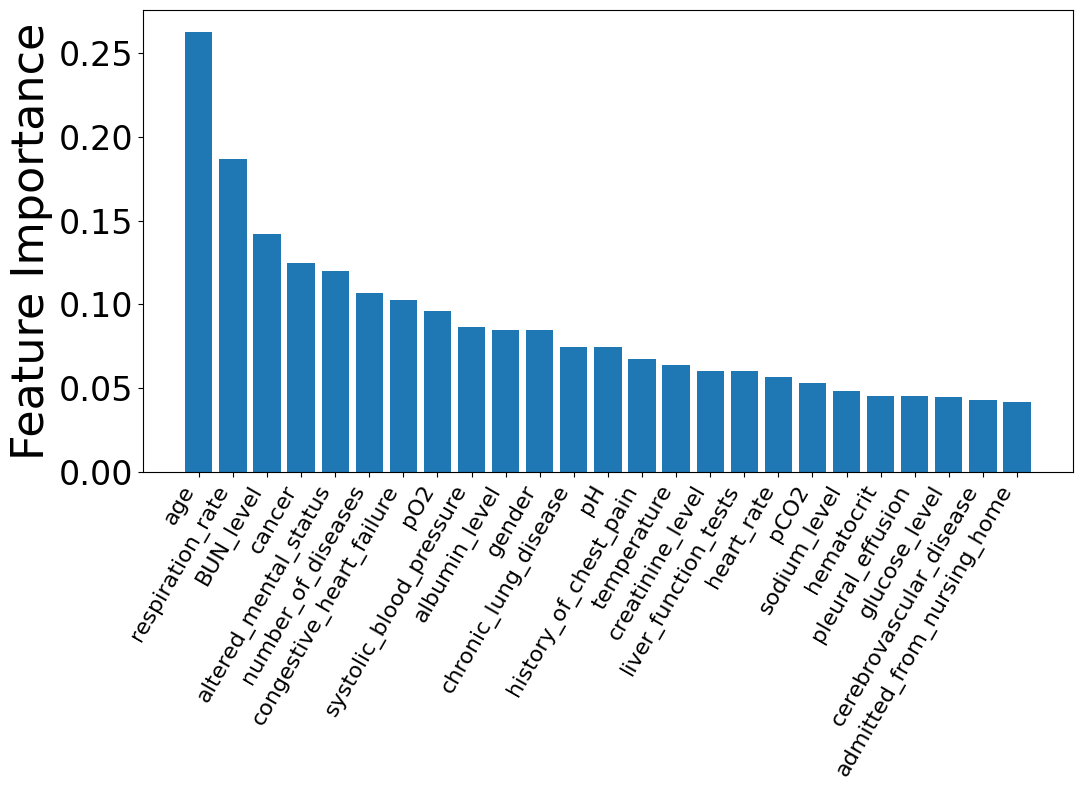

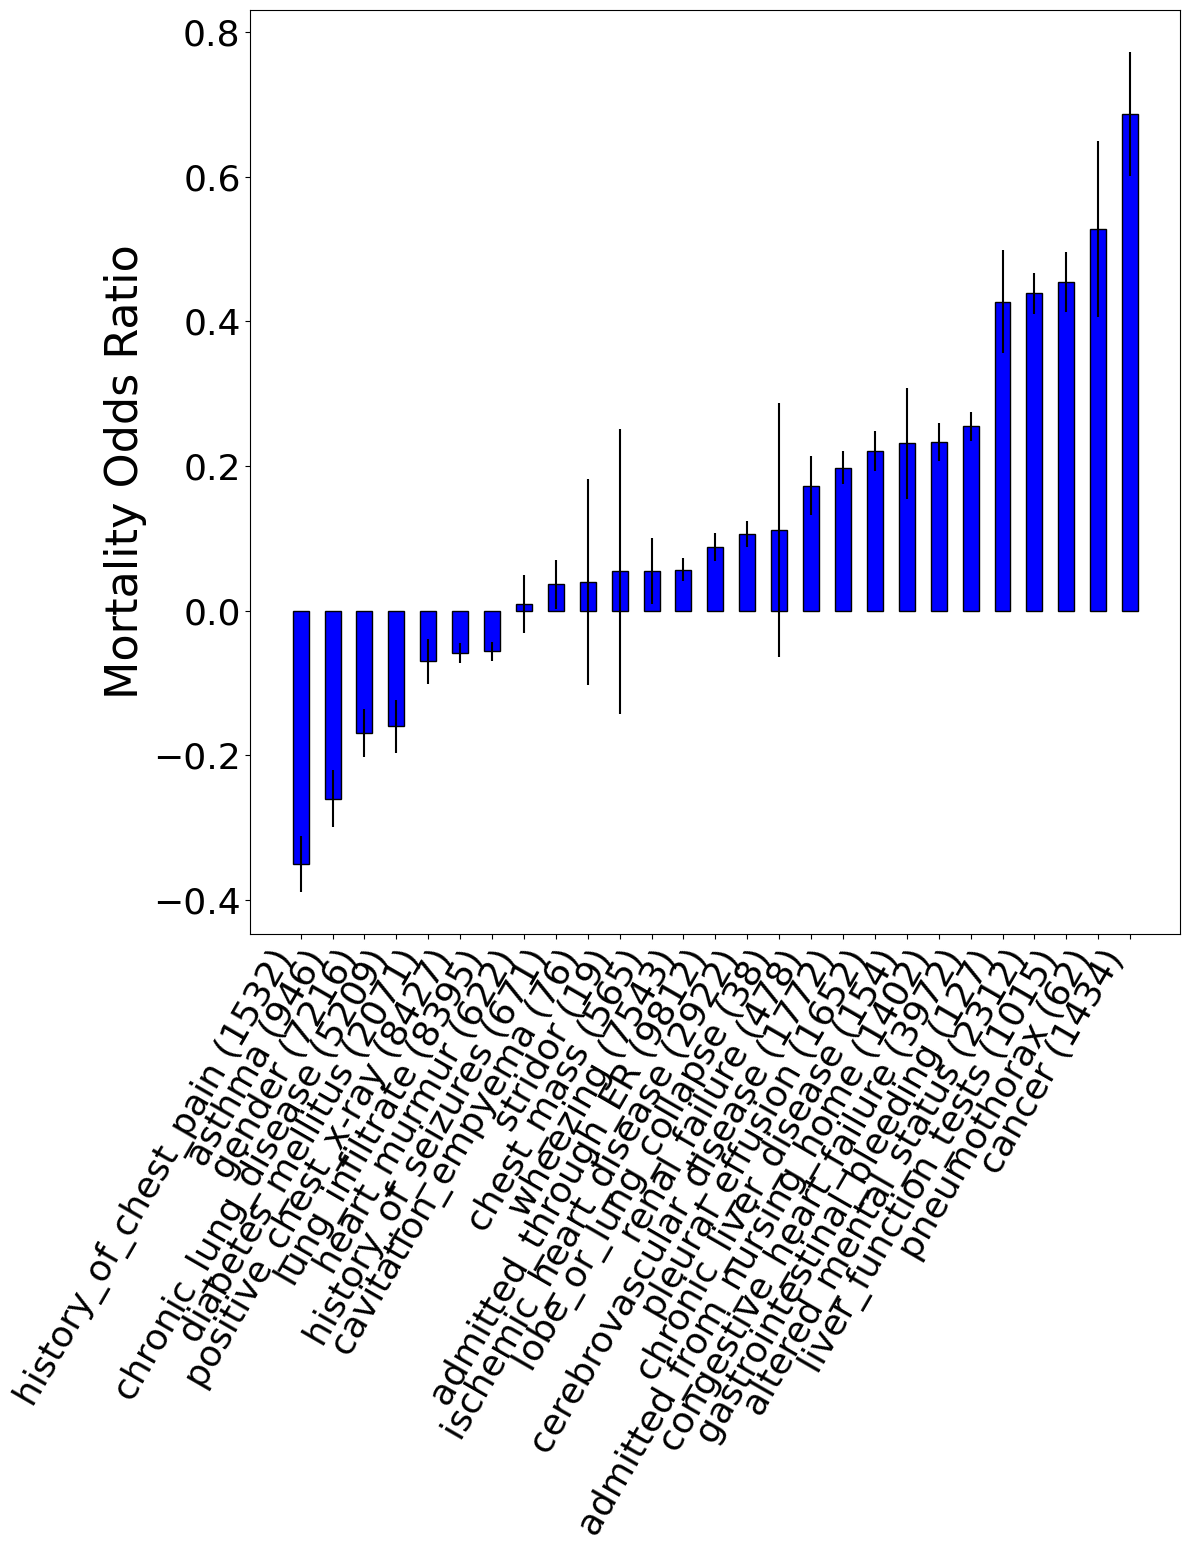

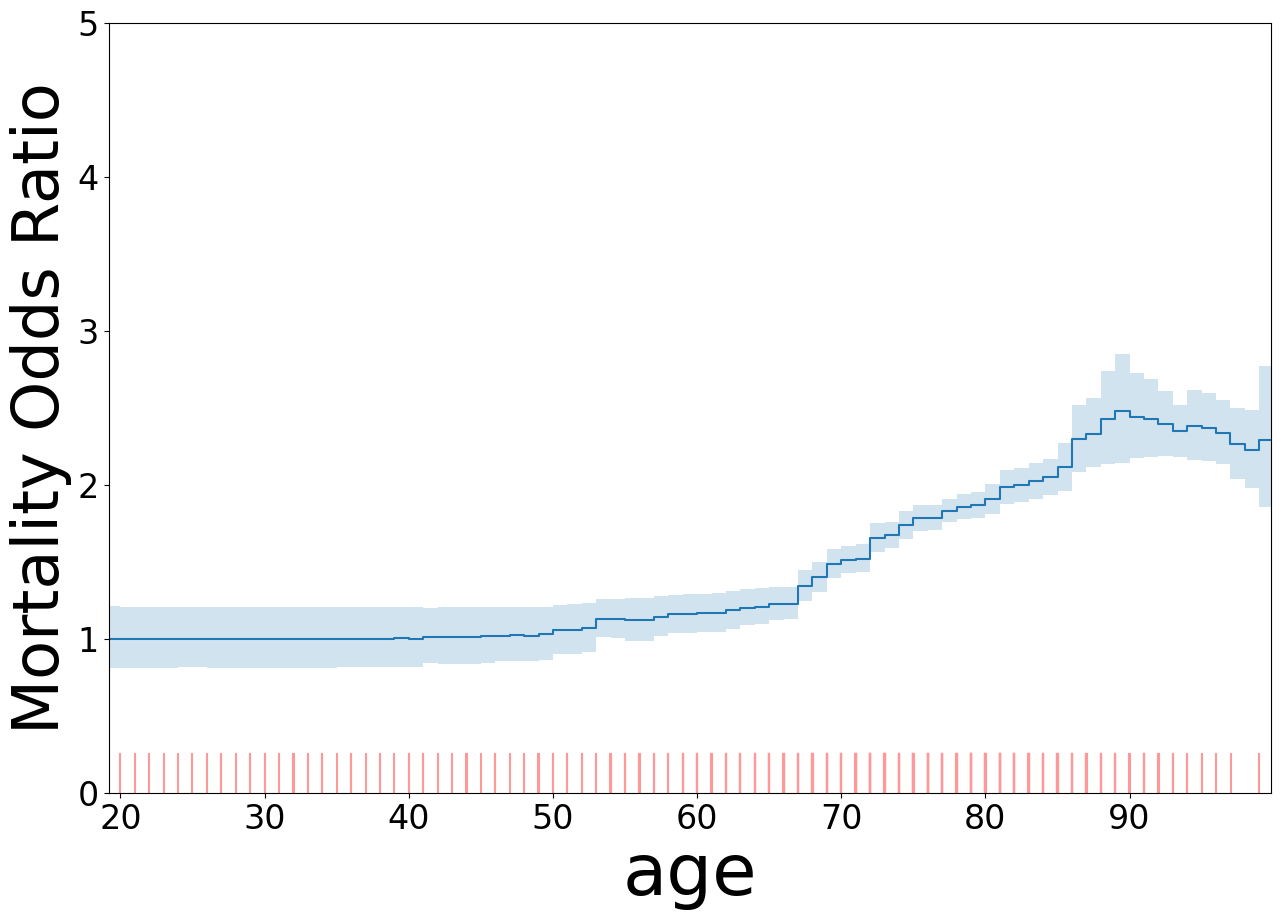

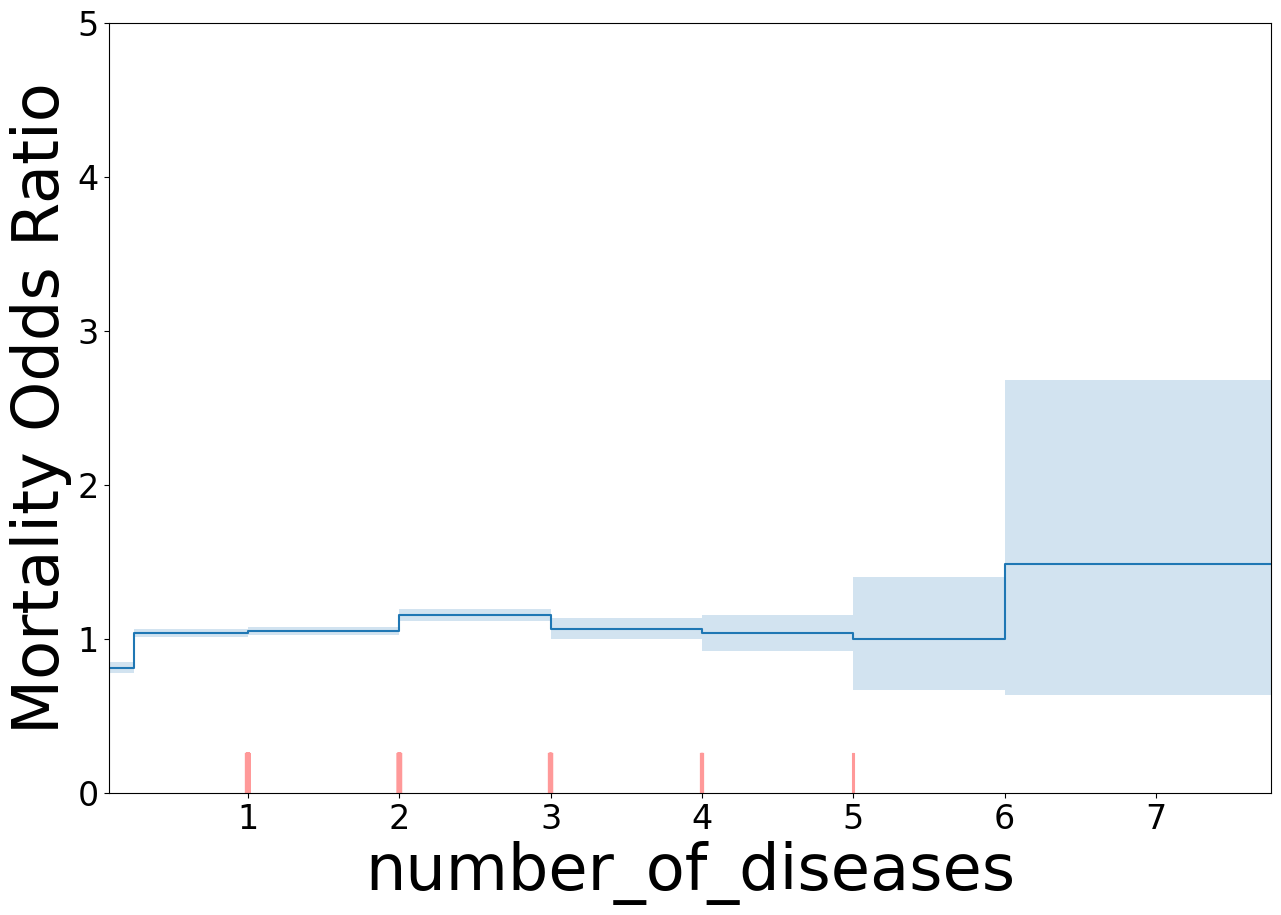

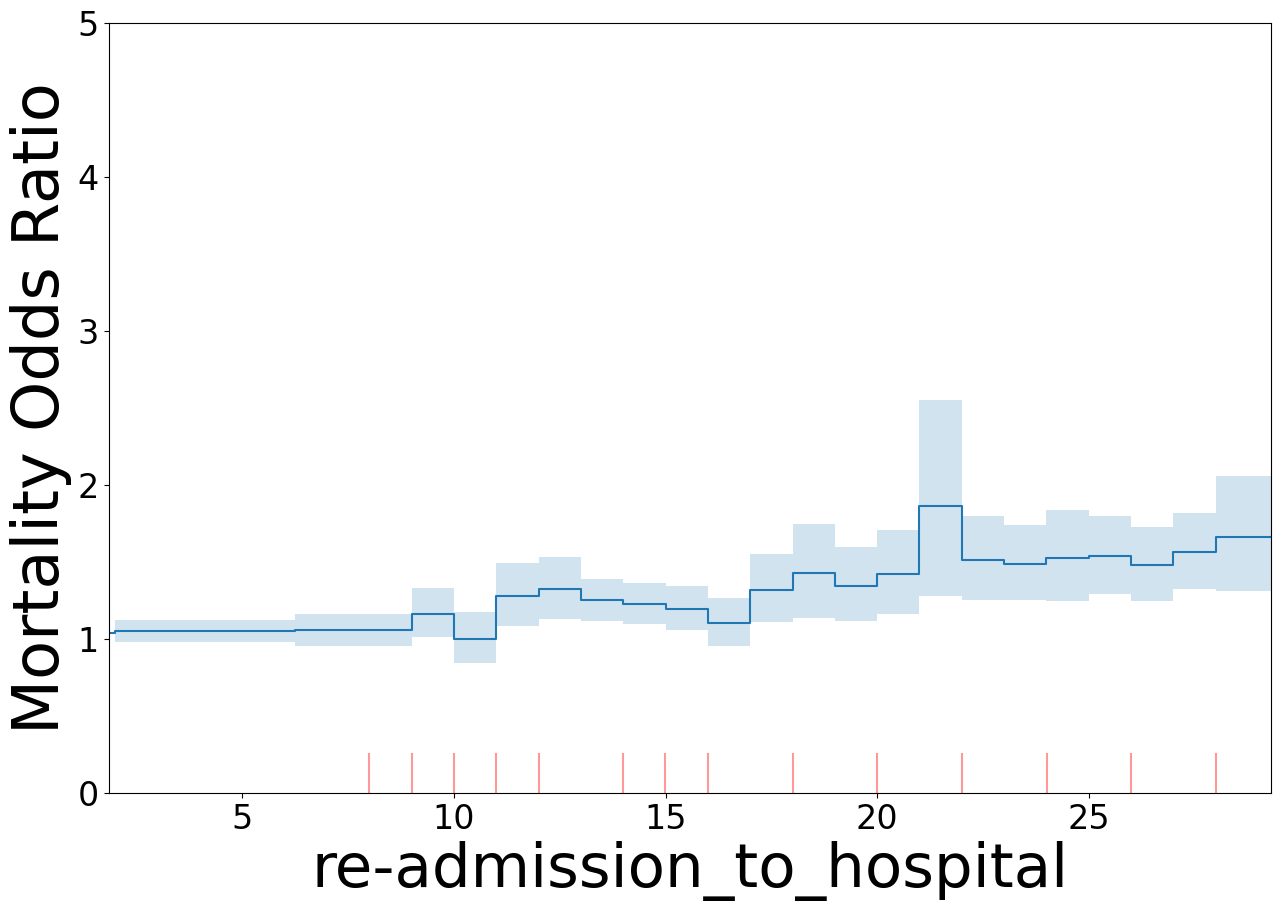

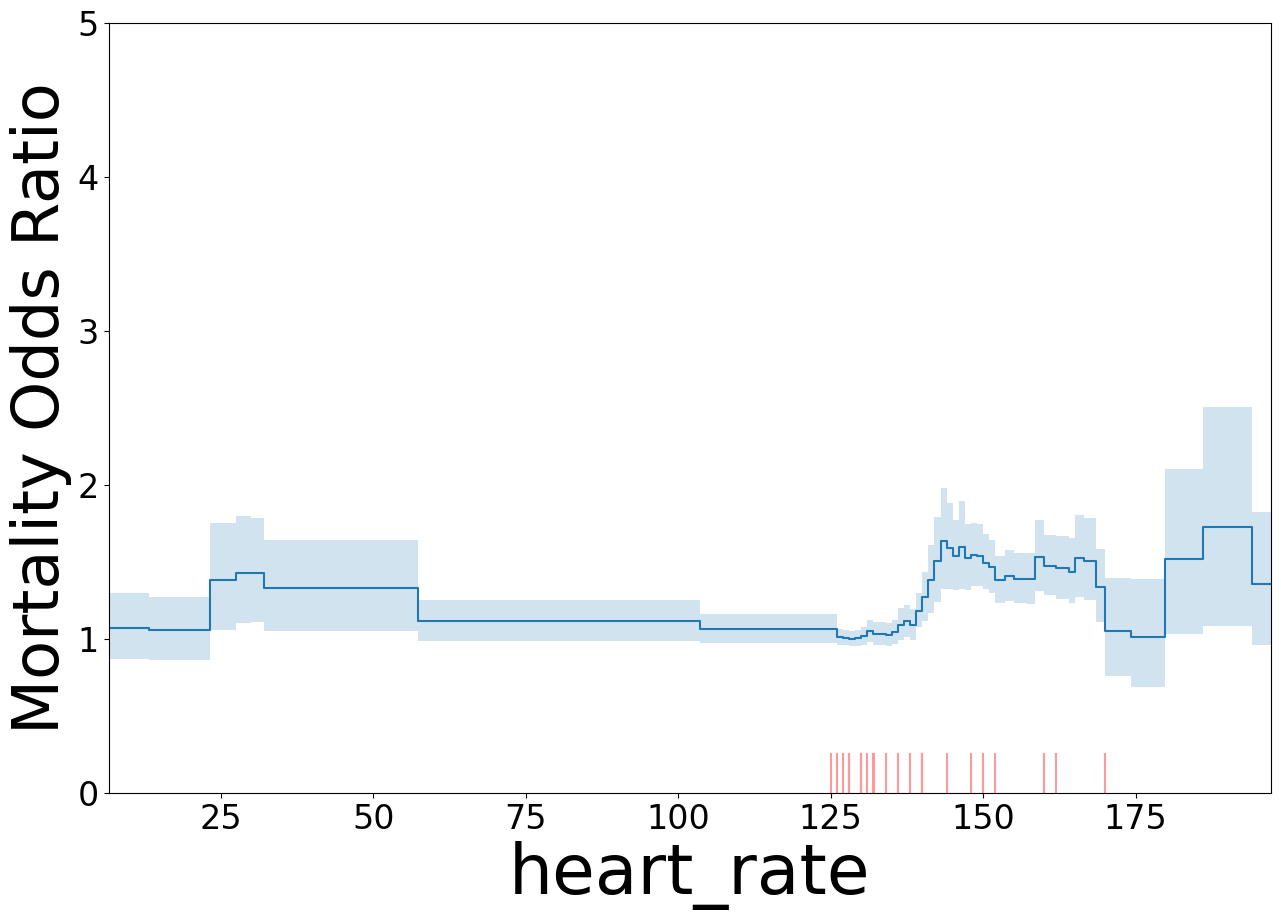

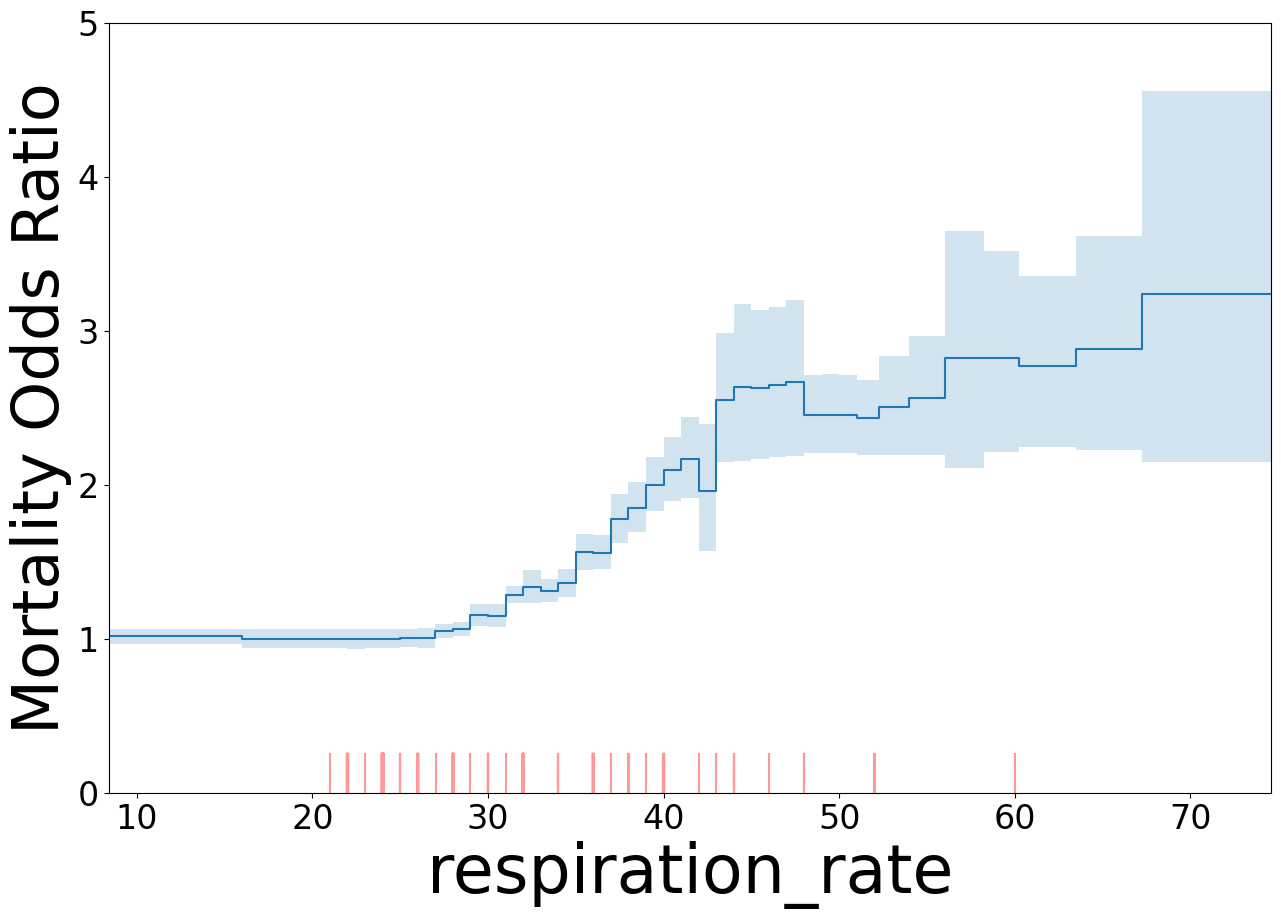

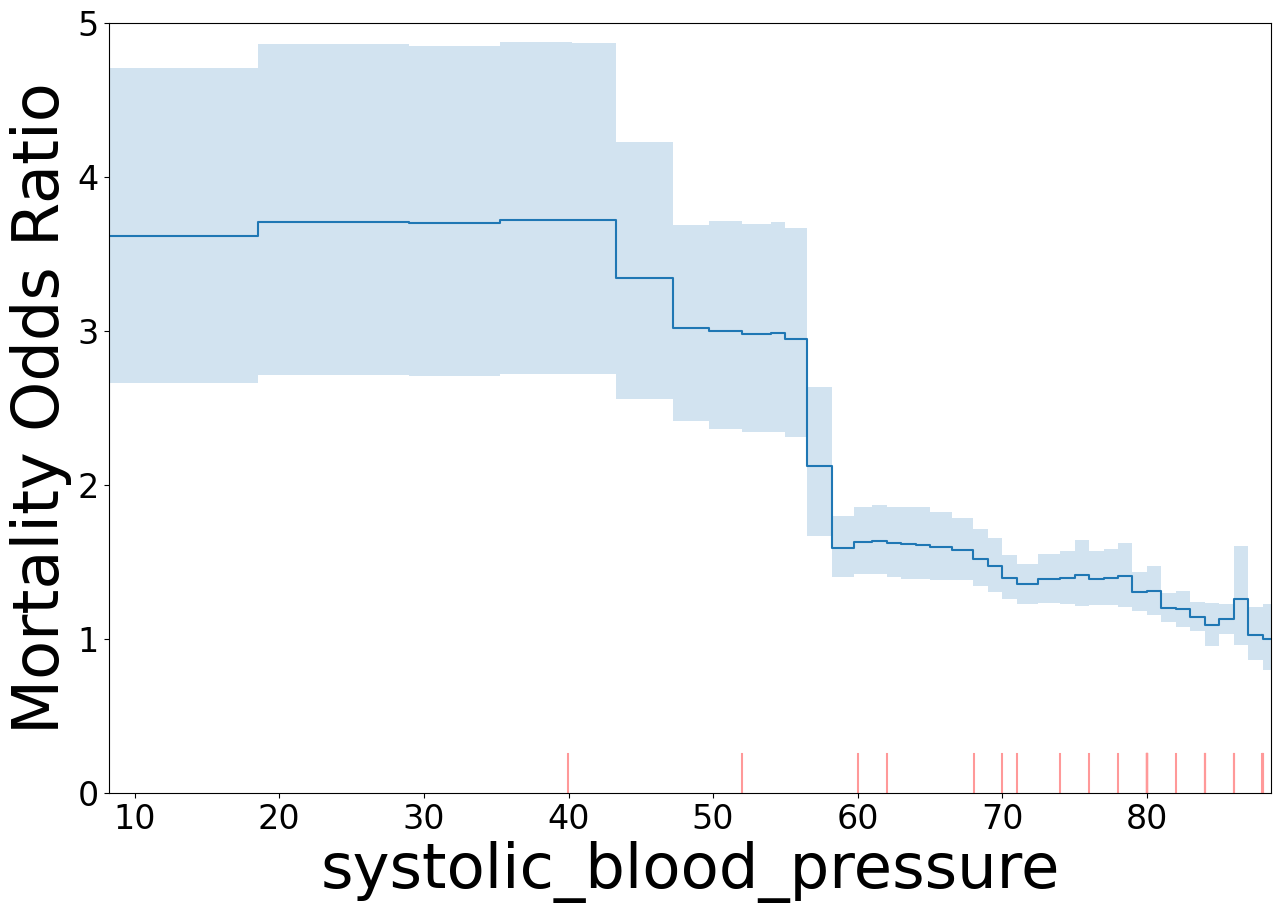

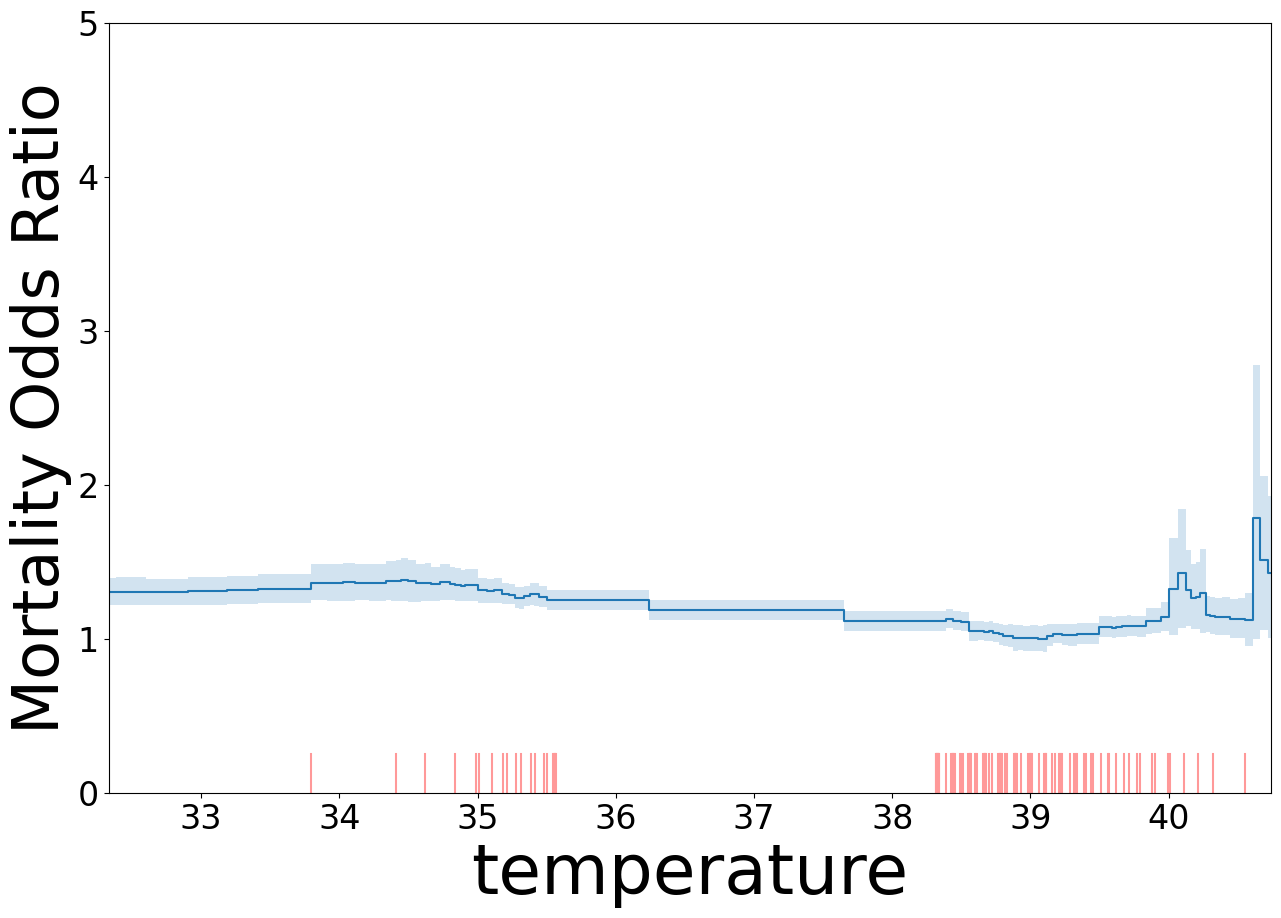

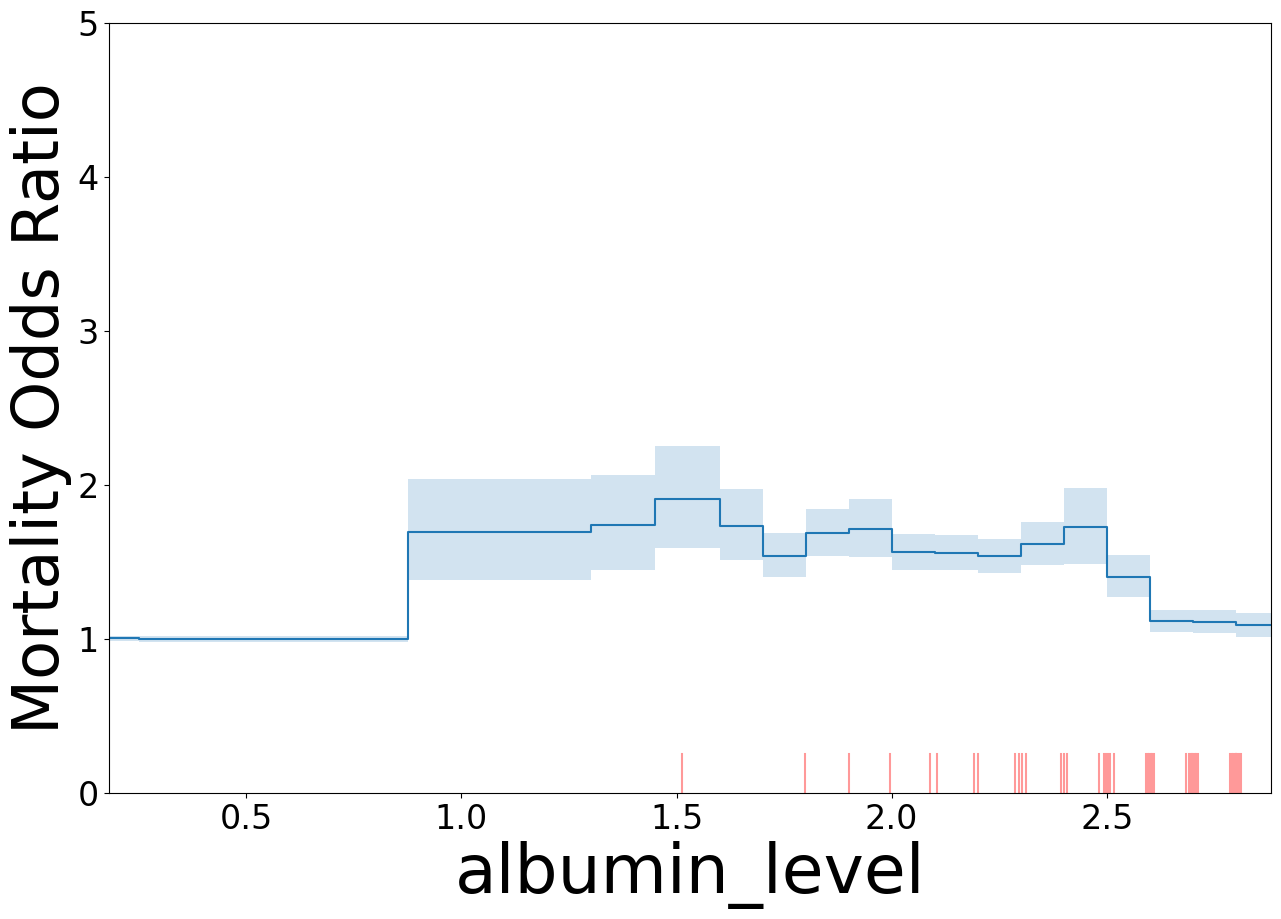

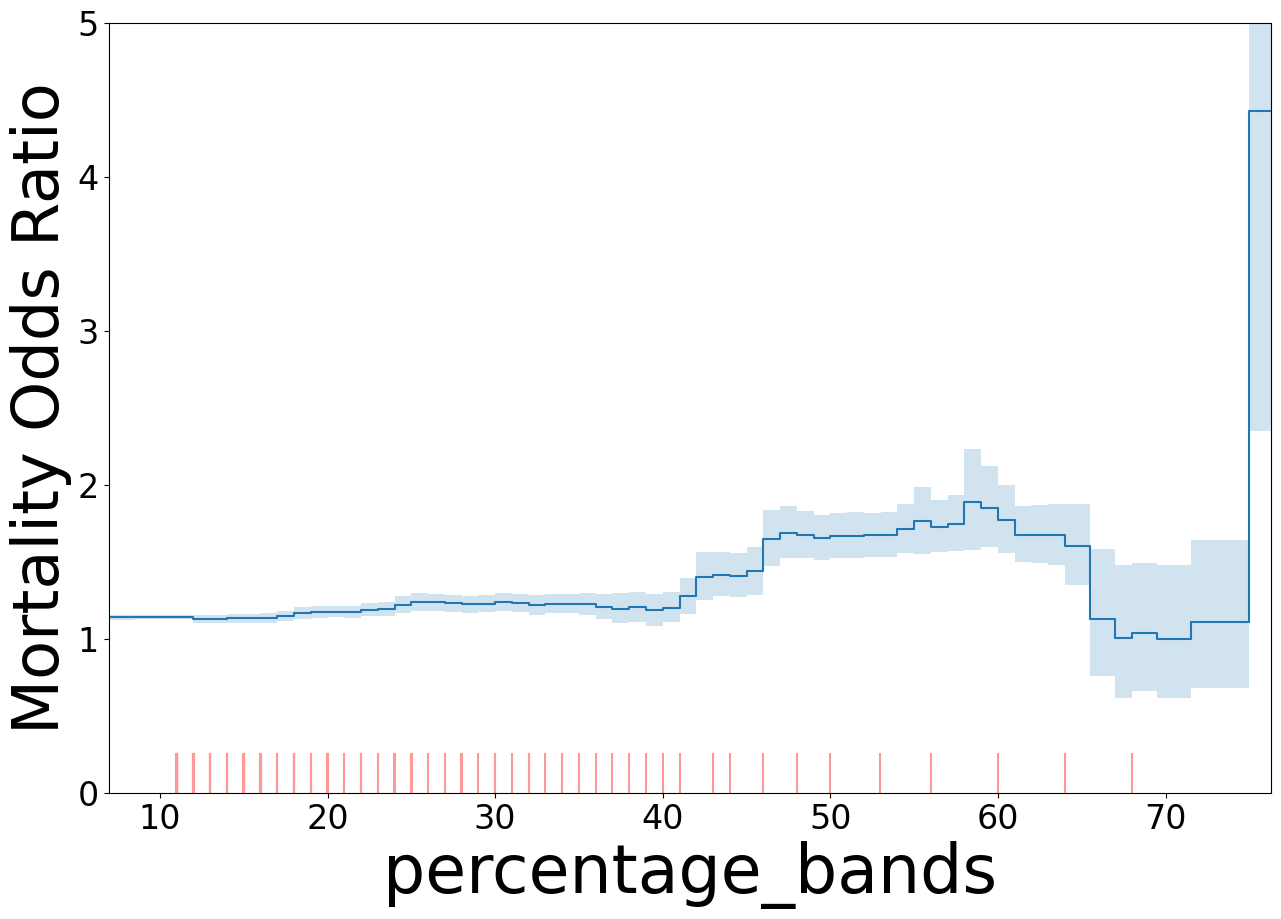

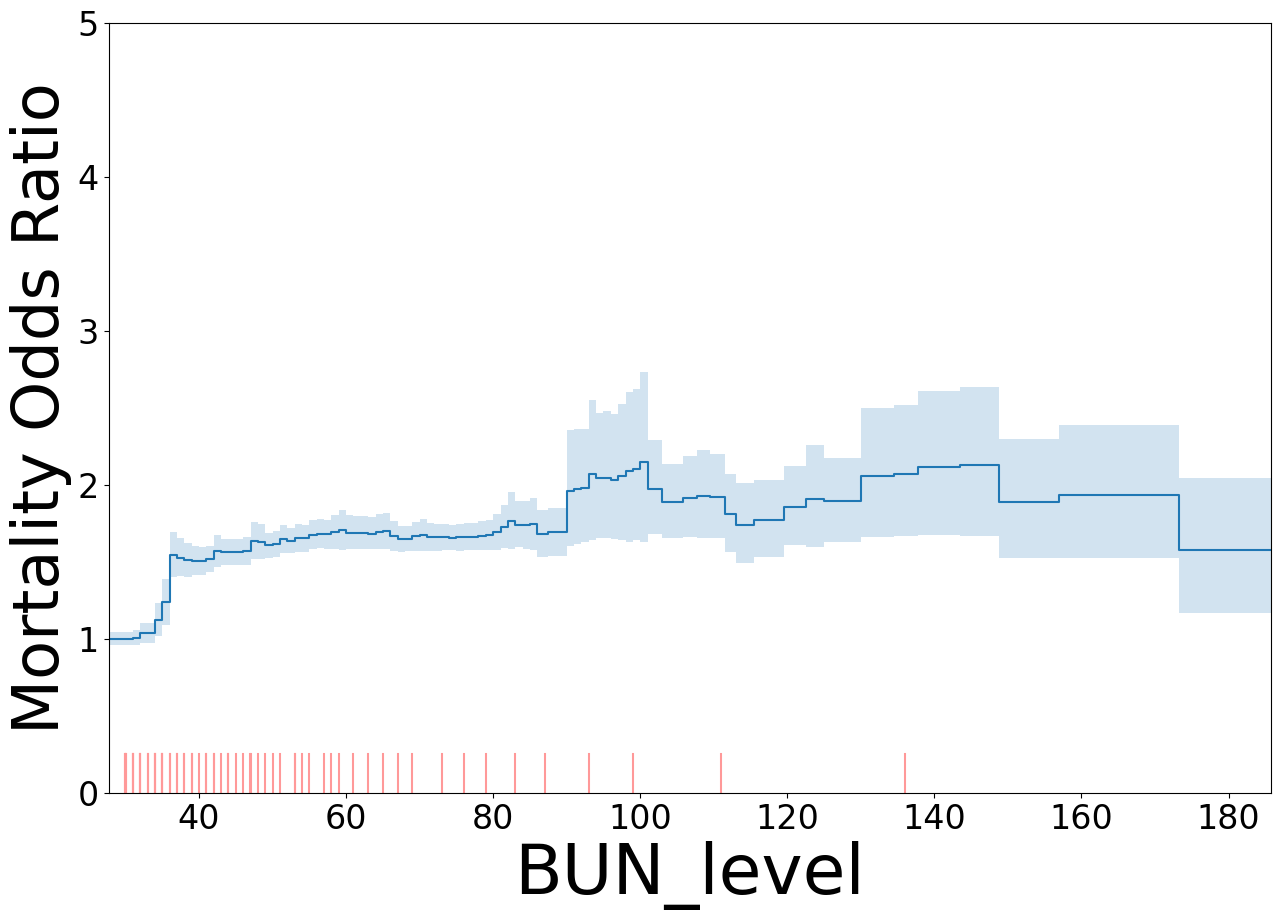

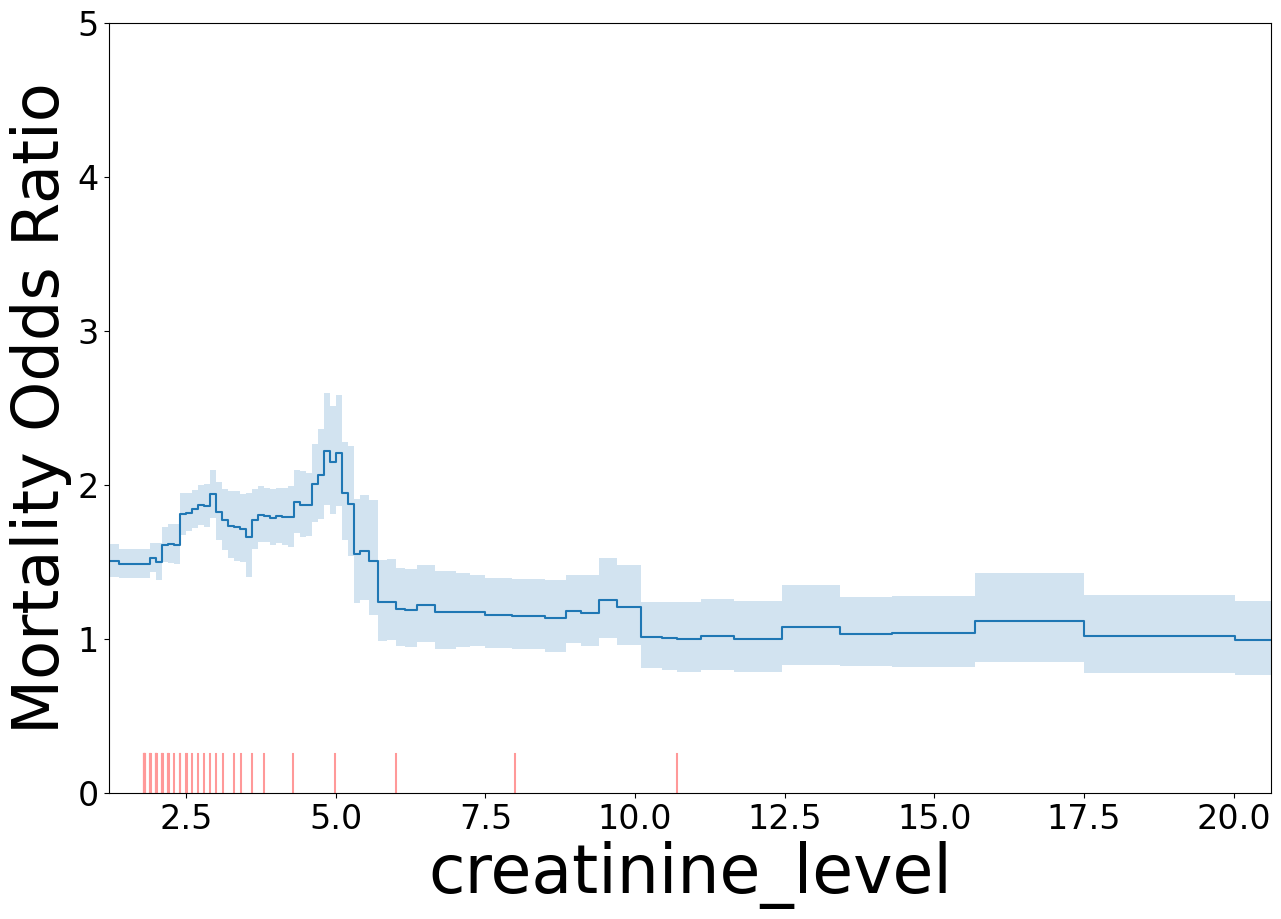

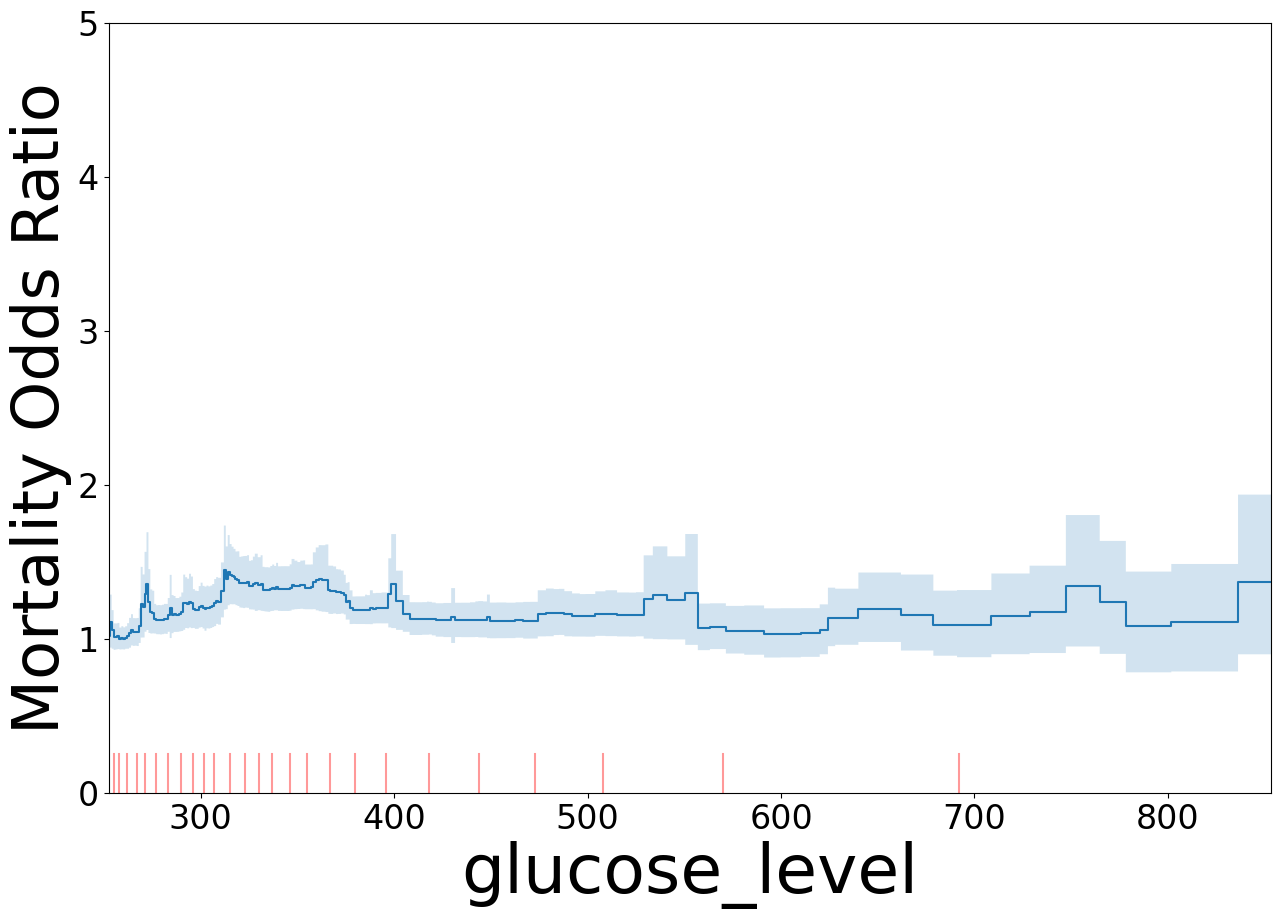

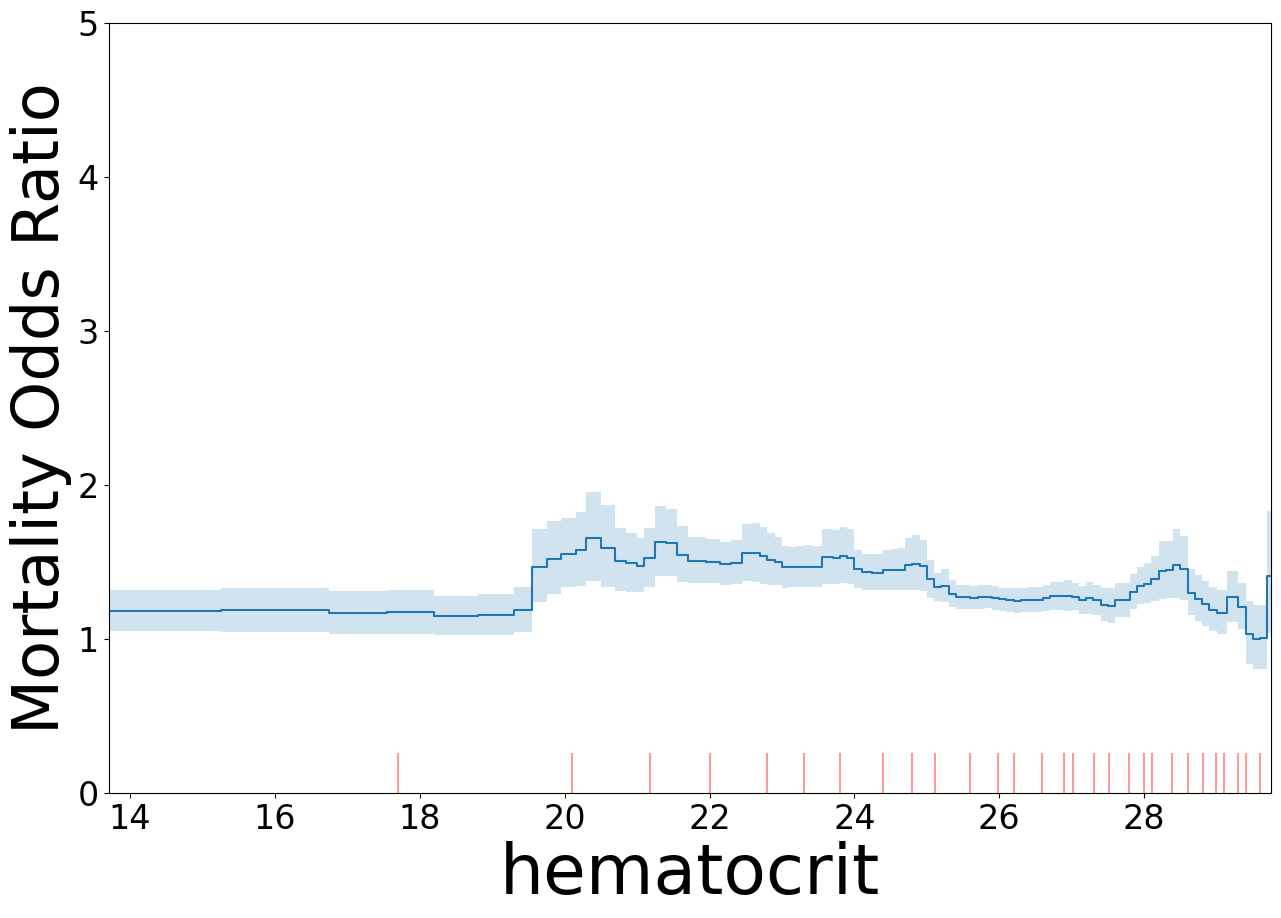

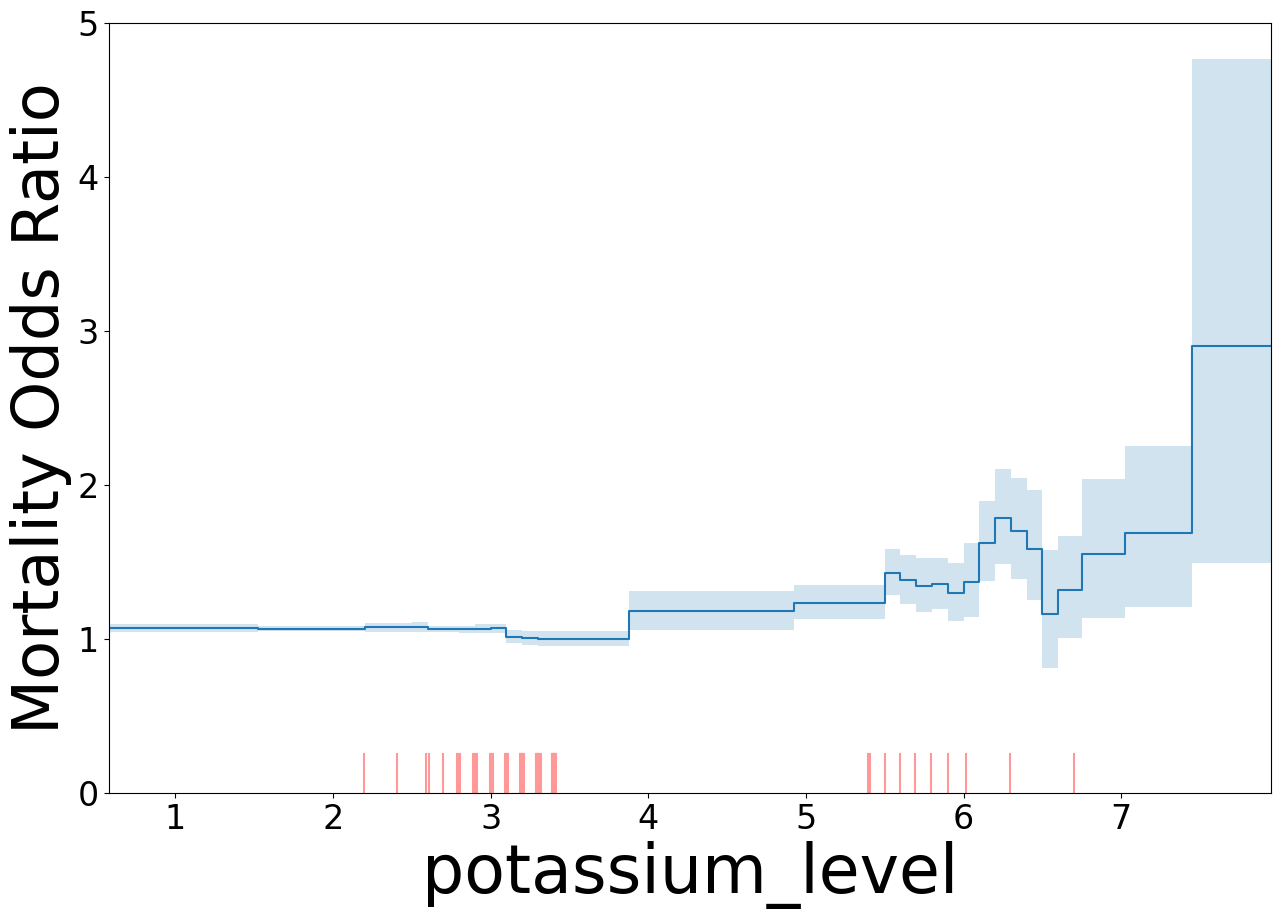

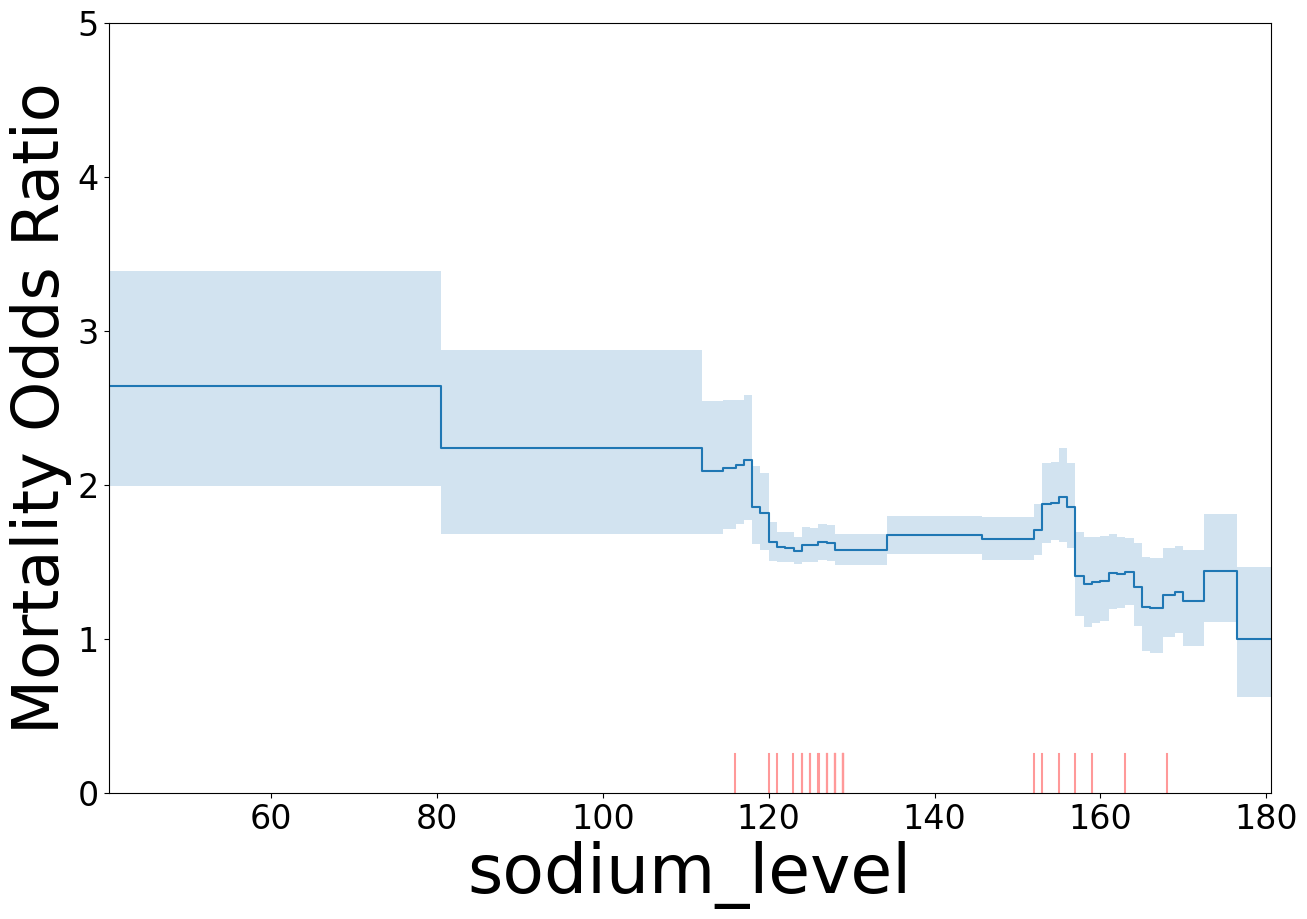

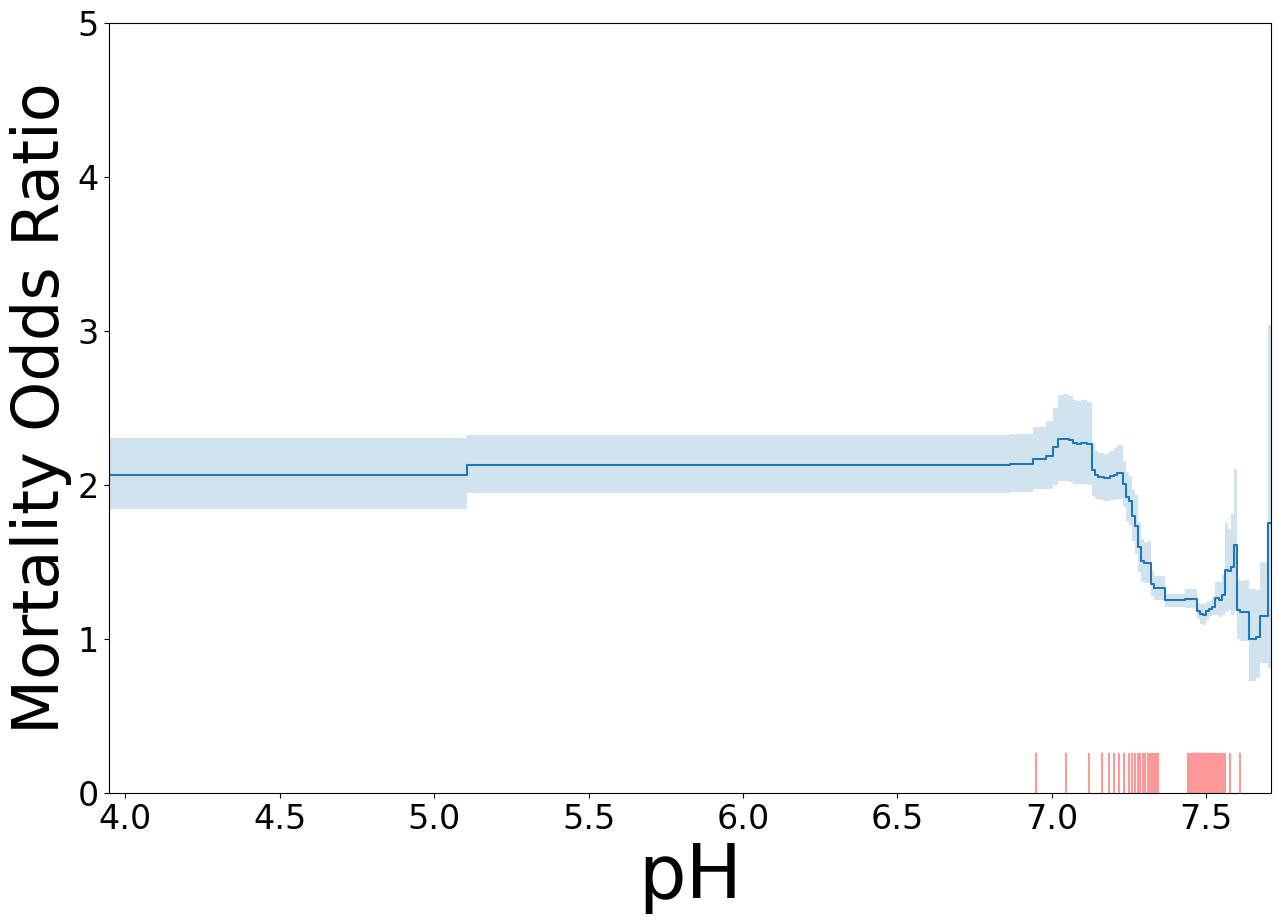

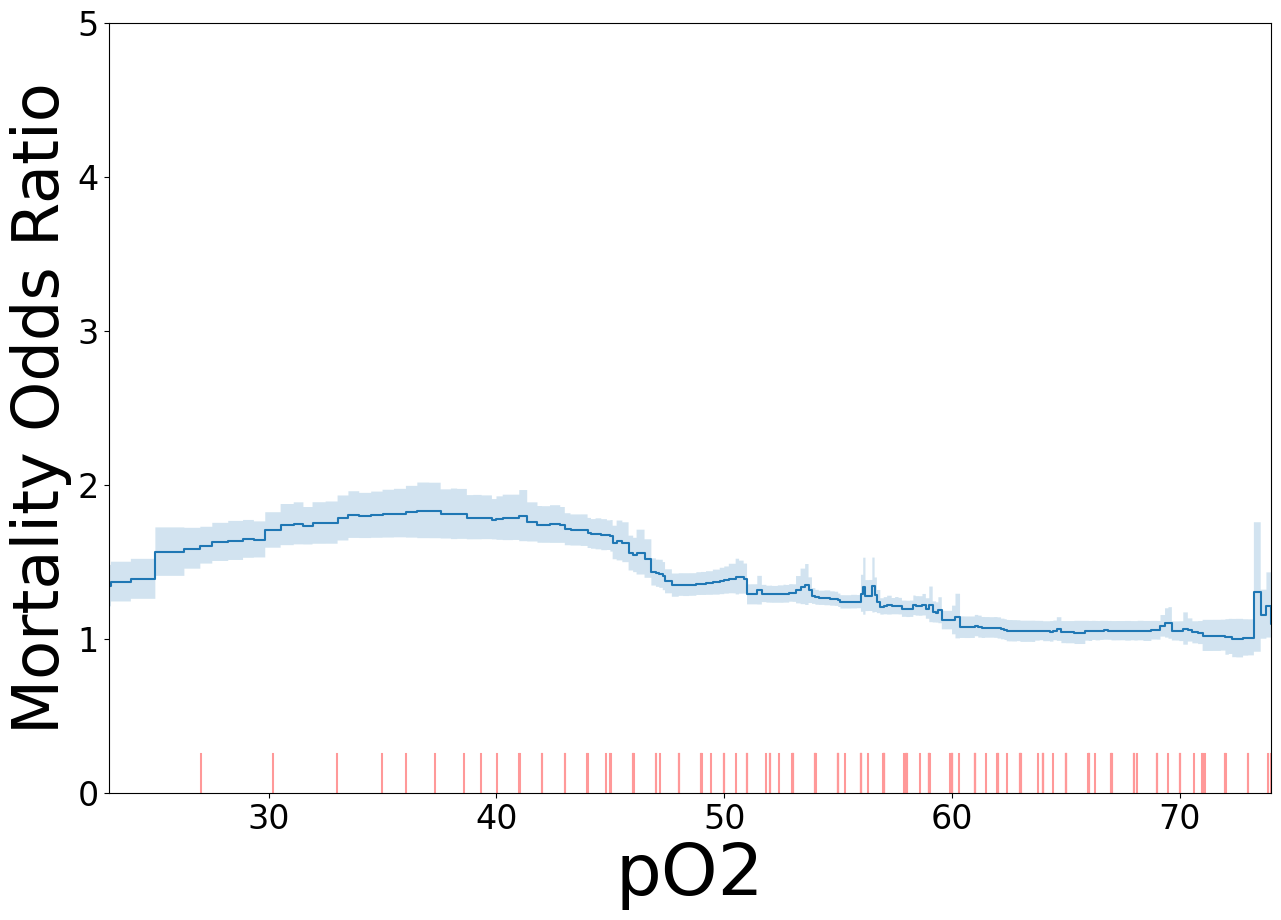

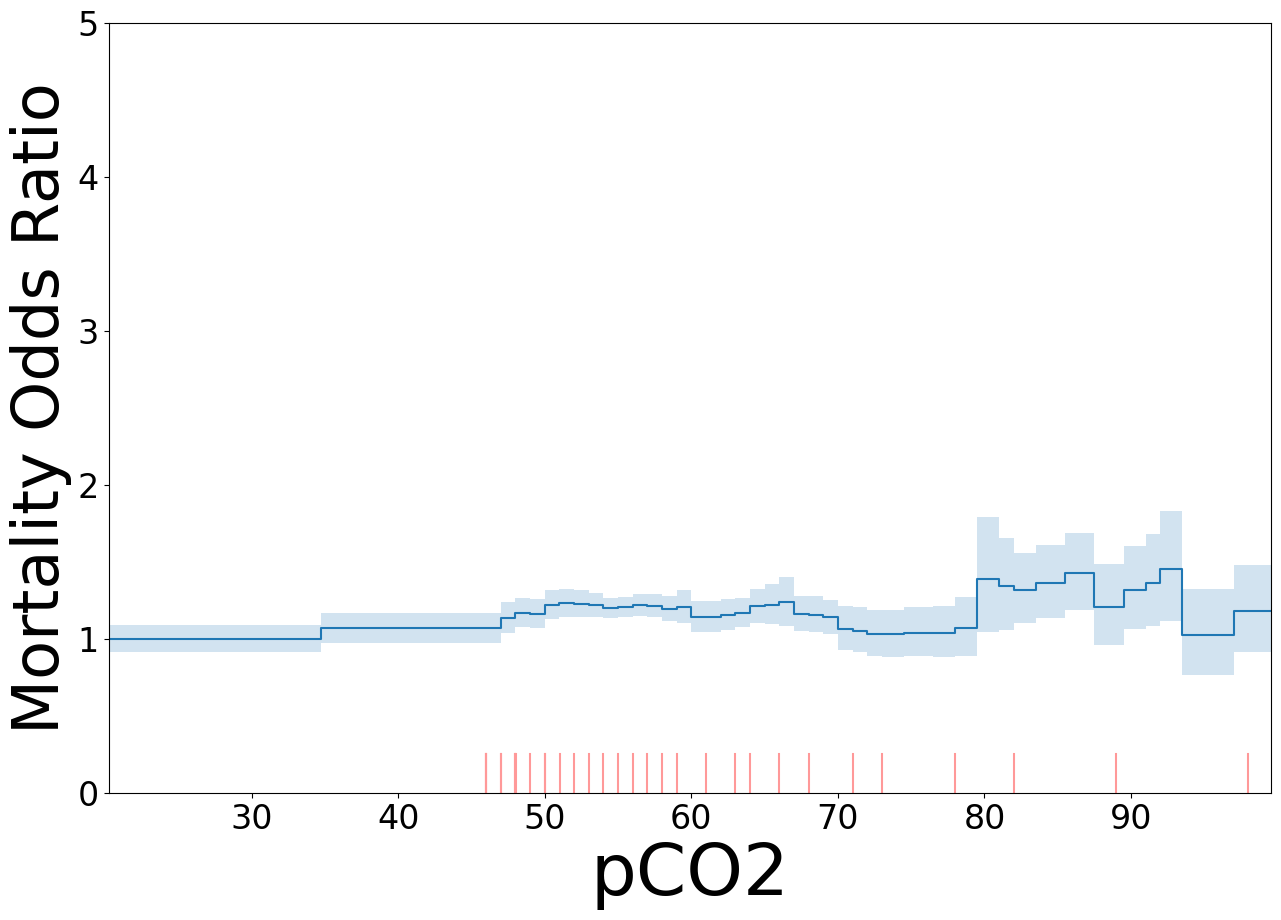

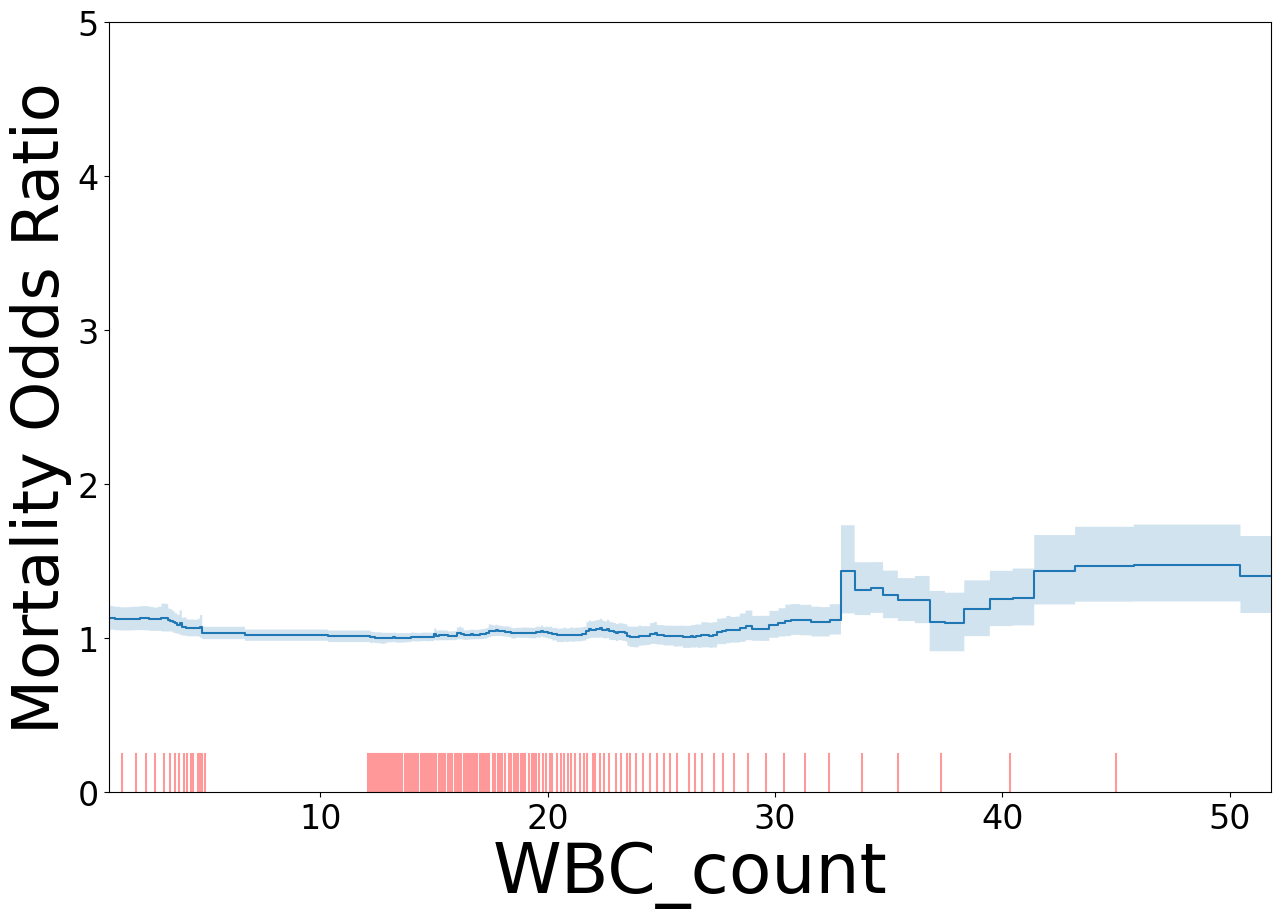

In [13]:
import ebm_utils
# Helper functions for pretty plotting available from:
# https://github.com/blengerich/ebm_utils

from ebm_utils.analysis.plot_utils import plot_all_features, plot_importances
from ebm_utils.analysis.purify_utils import purify_and_update
from ebm_utils.analysis.importance import calc_importance

plot_importances(ebm, 25)

plot_all_features(
    ebm_global, X,
    bool_mpl_style=True, bool_figsize=(12, 12),
    ylabel='Mortality Odds Ratio',
)